# Á¨¨ÂçÅ‰∏âÈÄ±ÔºöLLM Information Extraction
Êú¨Âë®Ë™≤Á®ãÁÇ∫„ÄåLLM Information Extraction„ÄçÔºå‰∏ªË¶ÅÊúÉ‰ΩøÁî®Âà∞ Langchian Â•ó‰ª∂Ëàá HuggingFace Ê®°Âûã‰æÜÂØ¶‰Ωú
1. LLM Inference Âü∫Êú¨ÁØÑ‰æã
2. Prompt Engineering
3. Information Extraction(Sentiment classification, NER)

### Â§ßÁ∂±Ôºö
1. LLM inference Âü∫Êú¨ÁØÑ‰æã
    * Langchian ‰ªãÁ¥π
      * Chain
        * LCEL (LangChain Expression Language)
        * RunnableSequence
        * RunnableParallel
      * Prompt templete
        * PromptTemplate
        * ChatPromptTemplate
          * System prompt
          * User prompt
      * Output parser
    * Inference

2. Prompt engineering
    * Few-shot
    * CoT
    * Self-consistency

3. Ë≥áÊñôÈõÜÂØ¶‰Ωú Information Extraction (Tagging)
    * Âè•Â≠êÊÉÖÁ∑íÂà§Âà• Sentiment Classification (Positive, Neutral, Negative)
    * NER

4. Retrieve QA (RAG)
    * Â≠∏Ê†°ÈÅ∏Ë™≤Ë¶èÁØÑ

# ÈÄ£Êé•Èõ≤Á´ØË≥áÊñôÂ§æ

In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Â•ó‰ª∂ÂÆâË£ù

In [2]:
!pip install jieba

!pip install sentence-transformers
!pip install transformers
!pip install sentencepiece

# Áî®Êñº transformer Âä†ÈÄü
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes

!pip install langchain-chroma
!pip install pypdf
!pip install langchain
!pip install huggingface_hub
!pip install grandalf
!pip install pandas
!pip install ctransformers
!pip install langchain_community

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 171.5/171.5 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [3]:
import os
from getpass import getpass

import pandas as pd
import ast
import json
import re
import jieba

from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import BitsAndBytesConfig # huggingface ÈáèÂåñ

from langchain_community.llms import HuggingFaceEndpoint

from langchain_core.prompts import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate

from langchain_core.runnables import RunnablePassthrough
from langchain_core.runnables import RunnableParallel
from langchain_core.runnables import RunnableLambda

from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

In [59]:
# Ë®≠ÂÆöÂúñÁöÑÂ≠óÈ´îÂ§ßÂ∞è
plt.rcParams['font.size'] = 10

# Ë®≠ÂÆöÂúñÁöÑ‰∏≠ÊñáÂ≠óÈ´î (ÁÑ°Ê≥ïÈ°ØÁ§∫ÁöÑË©±ÂèØ‰ª•Ë©¶Ë©¶‚ÄòMicrosoft JhengHei‚ÄôÂ≠óÈ´î)
# ‰πüÂèØÂèÉËÄÉÔºöhttps://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['jf-openhuninn-2.0'] #ÈáëËê±Á≤âÂúìÈ´î2.0
# plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']

# Ë®≠ÂÆöÊñáÂ≠óÈõ≤‰∏≠ÊñáÂ≠óÈ´îË∑ØÂæë ÈáëËê±Á≤âÂúìÈ´î2.0
FontPath = '/content/drive/MyDrive/w12_13/jf-openhuninn-2.0.ttf' # Ë®≠ÂÆöÂ≠óÂûã
# FontPath = './SourceHanSansTW-Regular.otf' # Ë®≠ÂÆöÂ≠óÂûã

plt.rcParams['axes.unicode_minus'] = False #‰ΩøË≤†ËôüËÉΩÂ§†È°ØÁ§∫

# Ë®≠ÂÆöÊï¥‰ªΩ notebook ÂúñÁâáÁöÑÈï∑ÂØ¨Ëàá dpi
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 150

# Path to the custom font
font_path = '/content/drive/MyDrive/w12_13/jf-openhuninn-2.0.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: jf-openhuninn-2.0


# HuggingFace Token

Ëº∏ÂÖ• HuggingFace Token
- get a token: https://huggingface.co/docs/api-inference/quicktour#get-your-api-token

In [10]:
HUGGINGFACEHUB_API_TOKEN = getpass()
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


# 1. LLM inference Âü∫Êú¨ÁØÑ‰æã

## Langchian ‰ªãÁ¥π
- Â∞àÈñÄÁî®‰æÜÈñãÁôºË™ûË®ÄÊ®°Âûã(Language Model)Áõ∏ÈóúÊáâÁî®ÁöÑÊ°ÜÊû∂(framework)
- ËÆìÈñãÁôºËÄÖÊï¥Âêà‰∏çÂêåÁöÑË™ûË®ÄÊ®°ÂûãÔºåÈñãÁôºÂÉè ChatGPT, ËÅäÂ§©Ê©üÂô®‰∫∫„ÄÅÊï∏‰ΩçÂä©ÁêÜÁ≠âÁ≠âÊáâÁî®Á®ãÂºè

<img src="https://python.langchain.com/v0.1/svg/langchain_stack.svg" width="50%"><img src="https://wangwei1237.github.io/2023/09/20/Introduction-to-LangChain/langchain.png" width="50%">
- **LangChain Libraries LangChain**: Áõ∏ÈóúÁöÑÂäüËÉΩËàá API Á≠âÁ≠âÔºåÊîØÊè¥ Python Ëàá JavaScript
- **LangChain Templates**: ‰∏Ä‰∫õÂ∏∏Ë¶ãÁöÑ LangChain Ê®°Êùø(templates)ÔºåËÆìÈñãÁôºËÄÖÂèØ‰ª•Â•óÁî®ÔºåÁúÅÂéªÈáçÊñ∞ÈñãÁôºÁöÑÊàêÊú¨
- **LangServe**: ÂèØ‰ª•Â∞á LangChain ÁöÑ chain ÈñãÁôºÊàê REST API ÁöÑÈÉ®‰ª∂
- **LangSmith**: ËÆìÈñãÁôºËÄÖÂ∞çË™ûË®ÄÊ®°ÂûãÈÄ≤Ë°åÊ∏¨Ë©¶„ÄÅË©ï‰º∞„ÄÅÈô§ÈåØ„ÄÅÁõ£ÊéßÁ≠âË°åÁÇ∫ÁöÑ 1 ÂÄãÂπ≥Âè∞


### ËºâÂÖ• LLM Ê®°Âûã & Âü∫Êú¨Ë©¢Âïè
- LLM
  - ÂÖ®ÂèÉÊï∏Ê®°Âûã
    - ‰∏ÄËà¨Ê®°ÂûãÂú®Ë®ìÁ∑¥ÊôÇÂ§ö‰ΩøÁî® 32-Bit Êàñ 16-Bit ÁöÑÊµÆÈªûÊï∏
    - 7B 16-Bit ÁöÑÊ®°ÂûãÔºåË¶ÅÊ∂àËÄóÊéâ 13 GiB ‰ª•‰∏äÁöÑ GPU Ë®òÊÜ∂È´îÔºå13B ÂèØËÉΩË¶Å 2x GiB ‰ª•‰∏ä
  - Quantization Ê®°Âûã
    - ÂèÉËÄÉÔºöhttps://ithelp.ithome.com.tw/m/articles/10330372
    - Â∞áÊ®°ÂûãËΩâÊèõÊàê 8-Bit Êàñ 4-Bit ÁîöËá≥Êõ¥‰ΩéÔºåÊ∏õÂ∞ëÊ®°Âûã‰ΩîÁî®ÁöÑ GPU Ë®òÊÜ∂È´î
- Langchian Ëàá HuggingFace Êï¥ÂêàÁöÑÂÖ©Á®ÆÂèñÂæóÊ®°ÂûãÊñπÂºè
  1.  HuggingFacePipeline
    - Load Ëá≥Êú¨Âú∞ÔºàÈúÄË¶ÅÊú¨Âú∞Ë≥áÊ∫êÔºâ
  2.  HuggingFaceEndpoint
    - Load Ëá≥ huggingface ÂÖ±‰∫´Âü∫Á§éË®≠ÊñΩ

#### HuggingFacePipeline
- Colab ÂÖçË≤ªÁâàÊú¨Ôºö15GB GPU RAM
- 7B ÂÖ®ÂèÉÊï∏Ê®°ÂûãÁÑ°Ê≥ïÂú®ÂÖçË≤ªÁâàÁöÑ Colab ‰∏≠‰ΩøÁî®ÔºàGPU RAM ÈúÄÊ±Ç‰∏çË∂≥ÔºâÔºå‰ΩøÁî® quantization ÂæåÁöÑ model

In [11]:
quant_config = BitsAndBytesConfig(load_in_4bit=True)

print(quant_config.is_quantizable())
print(quant_config.quantization_method())

True
fp4


In [12]:
model_id = "google/gemma-1.1-7b-it"

tokenizer = AutoTokenizer.from_pretrained(model_id, token=HUGGINGFACEHUB_API_TOKEN)
# device_map="auto" ‰ΩøÁî® GPU Âä†ÈÄü
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", quantization_config=quant_config, token=HUGGINGFACEHUB_API_TOKEN)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=300)
llm = HuggingFacePipeline(pipeline=pipe)

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the from rom langchain-huggingface package and should be used instead. To use it run `pip install -U from rom langchain-huggingface` and import as `from from rom langchain_huggingface import llms import HuggingFacePipeline`.
  warn_deprecated(


#### HuggingFaceEndpoint
- Langchian Êï¥Âêà huggingface severless api (https://huggingface.co/docs/api-inference/index)
- ÂèØ‰ΩøÁî®Ë∂ÖÈÅé 100,000 ÈÉ®ÁΩ≤Âú® Hugging Face Hub ‰∏äÁöÑÊ®°Âûã
- Host Âú® Hugging Face shared infrastructure ‰∏äÔºåÁÑ°ÈúÄÊú¨Âú∞Ë≥áÊ∫ê
  - Dynamically loaded on shared infrastructure



In [13]:
# repo_id: HuggingFace ‰∏äÁöÑÊ®°ÂûãÂêçÁ®±ÔºåÊú¨ÁØÑ‰æã‰ΩøÁî® gemma 7b instruct ÁâàÊú¨
    # huggingface: https://huggingface.co/google/gemma-1.1-7b-it
# temperature: Ê®°ÂûãÂõûÁ≠îÁöÑÊ¥ªÊΩëÁ®ãÂ∫¶Ôºå0~1 Ë∂äÂ§ßÊØèÊ¨°ÂõûÁ≠îÁöÑÂ§öÊ®£ÊÄßË∂äÈ´ò

llm = HuggingFaceEndpoint(
    repo_id="google/gemma-1.1-7b-it", temperature=1.0,model_kwargs={'token':HUGGINGFACEHUB_API_TOKEN, 'use_cache':False}
)
llm.invoke("‰Ω†Â•ΩÔºåÊàëÊÉ≥Ë≤∑ÈãºÁ≠Ü,Êé®Ëñ¶Âì™ÂÄãÂìÅÁâå")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceEndpoint` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the from langchain-huggingface package and should be used instead. To use it run `pip install -U from langchain-huggingface` and import as `from from langchain_huggingface import llms import HuggingFaceEndpoint`.
  warn_deprecated(


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


'ÂíåÂûãËôüÔºü\n\n‰ª•‰∏ãÊòØÈãºÁ≠ÜÁöÑÂìÅÁâåÂíåÂûãËôüÔºö\n\n* Sailor Professional Gear 21\n* Lamy Safari\n* Platinum Century\n* Cross Townsend\n* Pilot Metropolitan\n\n‰ª•‰∏ãÊòØÊàëÂ∞çÈãºÁ≠ÜÁöÑÊúüÊúõÔºö\n\n* Â§ñËßÄÁ∞°Á¥Ñ„ÄÅÊï¥ÊΩî\n* Á≠ÜÂãïÂπ≥È†ÜÔºåÂØ´Âá∫Â≠óË∑°Ê∏ÖÊô∞\n* ÊúâËâØÂ•ΩÁöÑÁ≠ÜËäØÊåÅÁêÉÊÄß\n* ÈÅ©ÂêàÊó•Â∏∏‰ΩøÁî®Âíå‰∏äË™≤\n\nÊ†πÊìö‰Ω†ÁöÑÊúüÊúõÔºå‰ª•‰∏ãÊé®Ëñ¶Ôºö\n\n* **Sailor Professional Gear 21**ÔºöÂ§ñËßÄÁ∞°Á¥Ñ„ÄÅÁ≠ÜÂãïÂπ≥È†ÜÔºåÁ≠ÜËäØÊåÅÁêÉÊÄßËâØÂ•ΩÔºåÈÅ©ÂêàÊó•Â∏∏‰ΩøÁî®Âíå‰∏äË™≤„ÄÇ\n* **Pilot Metropolitan**ÔºöÂ§ñËßÄÁ∞°Á¥Ñ„ÄÅÁ≠ÜÂãïÂπ≥È†ÜÔºåÁ≠ÜËäØÊåÅÁêÉÊÄßËâØÂ•ΩÔºåÈÅ©ÂêàÊó•Â∏∏‰ΩøÁî®Âíå‰∏äË™≤„ÄÇ\n* **Platinum Century**ÔºöÂ§ñËßÄÁ∞°Á¥Ñ„ÄÅÁ≠ÜÂãïÂπ≥È†ÜÔºåÁ≠ÜËäØÊåÅÁêÉÊÄßËâØÂ•ΩÔºåÈÅ©ÂêàÊó•Â∏∏‰ΩøÁî®Âíå‰∏äË™≤„ÄÇ\n\nÈÄô‰∏âÊ¨æÈãºÁ≠ÜÈÉΩÁ¨¶Âêà‰Ω†ÁöÑÊúüÊúõÔºå‰ΩÜSailor Professional Gear 21 ÁöÑÁ≠ÜËäØÊåÅÁêÉÊÄßÊõ¥Â•ΩÔºåÈÅ©ÂêàÊó•Â∏∏‰ΩøÁî®Âíå‰∏äË™≤„ÄÇ'

In [14]:
llm.invoke("ÊàëÂú®Ê∏õËÇ•Âπ´ÊàëÊ±∫ÂÆöÊàëÁöÑÂçàÈ§êË¶ÅÊúâÁîöÈ∫ºËèúËâ≤Ôºü")

'\n\n**Ê∏õËÇ•ÂçàÈ§êËèúËâ≤Âª∫Ë≠∞Ôºö**\n\n* **ÂØåÂê´Á∫ñÁ∂≠ÁöÑËî¨ËèúÔºö**È¶ôËçâ„ÄÅÈùíÊ§í„ÄÅÊ¥ãËî•„ÄÅÁï™ËåÑ„ÄÅËëâËèúÁ≠â„ÄÇ\n* **È´òÂê´ËõãÁôΩË≥™ÁöÑÈ£üÂìÅÔºö**È≠öËÇâÁâá„ÄÅÈõûËÇâËÉ∏ËÇâÁâá„ÄÅËõãÁôΩÁ≠â„ÄÇ\n* **‰ΩéËÑÇËÇ™ÁöÑÊ≤πÈ°ûÔºö** oliveÊ≤πÊàñ‰∫ûÈ∫ªÊ≤π„ÄÇ\n\n**ÂÖ∑È´îÂçàÈ§êËèúËâ≤Âª∫Ë≠∞Ôºö**\n\n* È¶ôËçâËÇâÊéíÈÖçÊ¥ãËî•Ê≤ô‰∏Å\n* ÈùíÊ§íÈõûËÇâÈ£ØÈÖçÁï™ËåÑÊ∏ÖÊπØ\n* È≠öËÇâÁâáÈÖçÈ¶ôËçâÊ¥ãËî•È£Ø\n* ËõãÁôΩÈÖçËëâËèúÈÖç oliveÊ≤π\n\n**Ê≥®ÊÑè‰∫ãÈ†ÖÔºö**\n\n* ÈÅ∏ÊìáÂØåÂê´Á∫ñÁ∂≠ÁöÑËî¨ËèúÔºå‰ª•Â¢ûÂä†È£ΩË∂≥ÊÑü‰∏¶Âπ´Âä©Ê∂àÈ£ü„ÄÇ\n* ÈÅ∏ÊìáÈ´òÂê´ËõãÁôΩË≥™ÁöÑÈ£üÂìÅÔºå‰ª•Âπ´Âä©Ê∏õÂ∞ëÈ£üÊ¨≤‰∏¶‰øÉÈÄ≤ËÇåËÇâÂêàÊàê„ÄÇ\n* ÈÅ∏Êìá‰ΩéËÑÇËÇ™ÁöÑÊ≤πÈ°ûÔºå‰ª•ÈÅøÂÖçÂä†Ê¨ä„ÄÇ'

### Chain
- LCEL (LangChain Expression Language)
    - ÂÆòÁ∂≤‰ªãÁ¥πÔºöhttps://python.langchain.com/v0.1/docs/expression_language/why/
    - Langchain Ë™™ÊòéÔºöLCEL ÂèØ‰ª•ËÆìÊàëÂÄëÊõ¥Á∞°ÂñÆÁöÑÈñãÁôºË§áÈõúÁöÑ chain ÊáâÁî®ÔºåÂèØ‰ª•ÊîØÊè¥ÔºöStreaming, Parallelism, logging„ÄÇ
    - ÁÇ∫‰∫ÜÁ∞°ÂñÆÂåñÔºåLCEL ÊúâÂÖ©ÁöÑ‰∏ªË¶ÅÂäüËÉΩ
        1. Áµ±‰∏ÄÁöÑÂçîÂÆö(Protocol)ÔºöÊâÄÊúâÁöÑ LCEL object ÈÉΩË¶ÅÈÅµÁÖß Runnable interfaceÔºåÁ∞°ÂñÆ‰æÜË™™ÈÉΩË¶ÅÂåÖÂê´‰ª•‰∏ãÊñπÊ≥ïÔºå‰æÜËÆìÂ§öÂÄã LCEL object ‰πãÈñìÂèØ‰ª• chain(ÈèàÁµêËµ∑‰æÜ):
            1. invoke (ÊîØÊè¥ÂñÆ‰∏ÄËº∏ÂÖ•„ÄÅÂñÆ‰∏ÄËº∏Âá∫Ôºâ
            2. batch (ÊîØÊè¥Â§öÂÄãËº∏ÂÖ•„ÄÅÂ§öÂÄãËº∏Âá∫Ôºâ
            3. stream (ÊîØÊè¥ÊúâÈÉ®ÂàÜÁµêÊûúÂ∞±Ëº∏Âá∫ÁöÑÊ®°Âºè)
            4. ainvoke (async ÁâàÊú¨ÁöÑ invoke)
            5. abatch (async ÁâàÊú¨ÁöÑ batch)
            6. astream (async ÁâàÊú¨ÁöÑ stream)
            
            - Ë©≥Á¥∞ÂÆöÁæ©Ôºö
                1. https://api.python.langchain.com/en/stable/runnables/langchain_core.runnables.base.Runnable.html#langchain_core.runnables.base.Runnable
                2. https://python.langchain.com/v0.1/docs/expression_language/interface/
        2. ÁµÑÂêàË™ûË®ÄÔºöËÆì chain ÁöÑÁµÑÂêàÊõ¥ÂÆπÊòì
            - Êèê‰æõ‰∏çÂêåÂÖÉ‰ª∂ÁµÑÂêàÁöÑÂäüËÉΩÔºå‰ΩøÁî® "|" Â∞á‰∏çÂêåÂÖÉ‰ª∂‰∏≤Âú®‰∏ÄËµ∑Ôºå‰æãÂ¶ÇÔºöprompt | llm
- Chain
    - ÂèØÈáçË§áÂü∑Ë°å
    - ÂèØËá™Áî±ÁµÑÂêà
    - ÊúâÂÖ©Á®Æ‰∏ªË¶ÅÁöÑÂûãÊÖã
        1. RunnableSequence: ‰æùÂ∫èÂü∑Ë°åÊØèÂÄã Runnable
        2. RunnableParallel: ÂêåÊôÇÂü∑Ë°å Runnable

#### RunnableSequence
- ‰æùÂ∫èÂü∑Ë°åÊØèÂÄã Runnable
- ‰ΩøÁî® "|" ÈÄ£Áµê

In [15]:
template = """‰Ω†ÊòØ‰∏Ä‰ΩçÂ∞àÂÆ∂ÔºåÊàëÁèæÂú®Âú®Â∞çÂªöÂ∏´ÁöÑÂªöËóùÂÅöË©ïË´ñÔºåË´ãÂïè‰ª•‰∏ãÂè•Â≠êÁöÑÊÉÖÁ∑íÁÇ∫‰ΩïÔºàÊ≠£Âêë,‰∏≠ÊÄß,Ë≤†ÂêëÔºâ: {question}"""

prompt = PromptTemplate.from_template(template)

prompt_output = prompt.invoke({"question": '‰Ω†ÁÇ∫‰ªÄÈ∫ºÊúâËæ¶Ê≥ïËÉΩÊääÊ∞¥ÁÖÆÁÑ¶Ôºü'})
prompt_output

StringPromptValue(text='‰Ω†ÊòØ‰∏Ä‰ΩçÂ∞àÂÆ∂ÔºåÊàëÁèæÂú®Âú®Â∞çÂªöÂ∏´ÁöÑÂªöËóùÂÅöË©ïË´ñÔºåË´ãÂïè‰ª•‰∏ãÂè•Â≠êÁöÑÊÉÖÁ∑íÁÇ∫‰ΩïÔºàÊ≠£Âêë,‰∏≠ÊÄß,Ë≤†ÂêëÔºâ: ‰Ω†ÁÇ∫‰ªÄÈ∫ºÊúâËæ¶Ê≥ïËÉΩÊääÊ∞¥ÁÖÆÁÑ¶Ôºü')

In [16]:
print(prompt_output)
llm_output = llm.invoke(prompt_output)
llm_output

text='‰Ω†ÊòØ‰∏Ä‰ΩçÂ∞àÂÆ∂ÔºåÊàëÁèæÂú®Âú®Â∞çÂªöÂ∏´ÁöÑÂªöËóùÂÅöË©ïË´ñÔºåË´ãÂïè‰ª•‰∏ãÂè•Â≠êÁöÑÊÉÖÁ∑íÁÇ∫‰ΩïÔºàÊ≠£Âêë,‰∏≠ÊÄß,Ë≤†ÂêëÔºâ: ‰Ω†ÁÇ∫‰ªÄÈ∫ºÊúâËæ¶Ê≥ïËÉΩÊääÊ∞¥ÁÖÆÁÑ¶Ôºü'


'\n\nÈÄôÂè•Â≠êÁöÑÊÉÖÁ∑íÁÇ∫Ë≤†Âêë„ÄÇÂõ†ÁÇ∫ÁÖÆÊ∞¥‰∏¶ÈùûÂÆπÊòìÁöÑ‰∫ãÔºåÂ¶ÇÊûúËÉΩÊääÊ∞¥ÁÖÆÁÑ¶ÔºåË°®Á§∫ÂªöÂ∏´ÁöÑÊäÄË°ì‰∏¶ÈùûÂá∫Ëâ≤„ÄÇ'

In [17]:
# RunnablePassthrough: ÂèØ‰ª•‰∏çËÆäÁöÑÂÇ≥ÈÅûÊï¥ÂÄã input

template = """‰Ω†ÊòØ‰∏Ä‰ΩçÂ∞àÂÆ∂ÔºåÊàëÁèæÂú®Âú®Â∞çÂªöÂ∏´ÁöÑÂªöËóùÂÅöË©ïË´ñÔºåË´ãÂπ´‰ª•‰∏ãÂè•Â≠êÁöÑË©ïÂàÜÊÉÖÁ∑íÂàÜÊï∏Ôºà‰ªãÊñº -1.0~1.0ÔºåË∂äÈ´òÂàÜ‰ª£Ë°®Ë∂äÊ≠£ÂêëÔºåÂèç‰πãË∂äË≤†ÂêëÔºâ: {question}"""

prompt = PromptTemplate.from_template(template)

sentiment_value_chain = (
    {"question": RunnablePassthrough()}
    | prompt
    | llm
)
sentiment_value_chain.invoke("‰Ω†ÁÇ∫‰ªÄÈ∫ºÊúâËæ¶Ê≥ïËÉΩÊääÊ∞¥ÁÖÆÁÑ¶„ÄÇ")

'\n\nË©ïÂàÜÔºö-0.5\n\nËß£ÈáãÔºöÈÄôÂè•Â≠êÁöÑË©ïÂàÜÊÉÖÁ∑íÂàÜÊï∏ÁÇ∫ -0.5ÔºåÂõ†ÁÇ∫ÂÆÉÂ∏∂ÊúâËºïÂæÆÁöÑË≤†Èù¢ÊÉÖÁ∑íÔºåÂõ†ÁÇ∫ÂÆÉÊåáË≤¨ÂªöÂ∏´Âú®ÁÖÆÊ∞¥ÊñπÈù¢ÊúâËÉΩÂäõ‰∏çË∂≥„ÄÇ'

#### RunnableParallel

In [18]:
# Ë®≠ÂÆöÁπÅÈ´î‰∏≠ÊñáË©ûÂ∫´
jieba.set_dictionary("/content/drive/MyDrive/w12_13/dict.txt.big")

# Êñ∞Â¢ûstopwords
# jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tagsÊâçÊúÉ‰ΩúÁî®
with open("/content/drive/MyDrive/w12_13/stopwords.txt", encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

# Ë®≠ÂÆöÊñ∑Ë©û function
def getToken(row):
    seg_list = jieba.cut(row, cut_all=False)
    seg_list = [
        w for w in seg_list if w not in stopWords and len(w) > 1
    ]  # ÁØ©ÈÅ∏ÊéâÂÅúÁî®Â≠óËàáÂ≠óÂÖÉÊï∏Â§ßÊñº1ÁöÑË©ûÂΩô
    return seg_list

# ËÆÄÂèñÊÉÖÁ∑íÂ≠óÂÖ∏
liwc_dict = pd.read_csv("/content/drive/MyDrive/w12_13/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})



In [19]:
# call lexicon base function
def lexicon_base_sentiment_value(value: dict) -> str:
    tokens = getToken(value['question'])
    df = pd.DataFrame(tokens, columns=['word'])
    liwc_df = pd.merge(df, liwc_dict, how="left")
    sentiment_count = pd.DataFrame(
        liwc_df.groupby(["sentiments"]).size()
    ).reset_index()
    result_dict = sentiment_count.set_index('sentiments')[0].to_dict()
    print(result_dict)
    s_value = (result_dict.get('positive') if result_dict.get('positive') != None else 0) - (result_dict.get('negative') if result_dict.get('negative') != None else 0)
    return s_value


lexicon_sentiment_value_chain = RunnableLambda(lexicon_base_sentiment_value)

parallel = {"runnable_1": lexicon_sentiment_value_chain, "runnable_2": sentiment_value_chain}

chain = RunnableLambda(lambda x: x) | parallel
answer = chain.invoke({'question':'ÈÄôÈ¥®ËÇâÊúâÂ§†ÁîüÔºåÁîüÂà∞ÈÄ£ÂØ¶ÁøíÈÜ´ÁîüÈÉΩËÉΩÊääÁâ†ÊïëÊ¥ª„ÄÇ'})

print(answer)

Building prefix dict from /content/drive/MyDrive/w12_13/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/w12_13/dict.txt.big ...
Dumping model to file cache /tmp/jieba.uc76bf7d024595214c81ac1380f1d54b2.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.uc76bf7d024595214c81ac1380f1d54b2.cache
Loading model cost 2.010 seconds.
DEBUG:jieba:Loading model cost 2.010 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


{}
{'runnable_1': 0, 'runnable_2': '\n\nË©ïÂàÜÊÉÖÁ∑íÂàÜÊï∏Ôºö-0.8\n\n**Ë©ï‰º∞Ôºö**ÈÄôÂè•Â≠êÂ∏∂ÊúâË≤†Èù¢ÊÉÖÁ∑íÔºåÂõ†ÁÇ∫ÂÆÉ‰ª•Áîü duck ÁöÑÁ®ãÂ∫¶‰æÜË©ïÈáèÂªöÂ∏´ÁöÑÂªöËóùÔºå‰∏¶‰∏îÊöóÁ§∫ÂªöÂ∏´ÁöÑÂªöËóù‰∏çË∂≥‰ª•Ê≤ªÁôíÂèóÂÇ∑ÁöÑÈ¥®ËÇâ„ÄÇ'}


In [20]:
chain = RunnableParallel(lexicon=lexicon_sentiment_value_chain, LLM=sentiment_value_chain)
chain.invoke({'question':'Ë∑ü‰Ω†ÁöÑÈ§êÈªûÊØîÔºåÊàëÊØîËºÉÂñúÊ≠°ÂêÉÂúü'})

{'affect': 1, 'positive': 1}


{'lexicon': 1,
 'LLM': '„ÄÇ\n\n**Ë©ïÂàÜÊÉÖÁ∑íÂàÜÊï∏Ôºö-0.8**\n\n**Ë©ïÈáãÔºö**Ê≠§Âè•Â≠êÁöÑÊÉÖÁ∑íÂàÜÊï∏ÁÇ∫ -0.8ÔºåÂõ†ÁÇ∫ÂÆÉË°®ÈÅî‰∫ÜÂ∞çÈ§êÈªûÁöÑÂé≠ÊÉ°ÂíåÂ∞çÂúüÁöÑÂÅèÂ•ΩÔºåÈÄôÊòØ‰∏ÄÂÄãË≤†Èù¢ÊÉÖÁ∑í„ÄÇ'}

### Prompt templete
- ÂÆòÁ∂≤Ôºöhttps://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/
- Prompt templete ÂèØ‰ª•È†êÂÖàÂÆöÁæ©‰∏ÄÂÄãË¶ÅËº∏ÂÖ•Áµ¶ LLM ÁöÑÊñáÂ≠óÊ®°Êùø
- Langchian Êèê‰æõ‰∫ÜÂª∫Á´ã prompt templete ÁöÑÂ∑•ÂÖ∑
- ÈÄöÂ∏∏ÊúâÂÖ©Á®ÆÂûãÊÖãÔºö
    1. PromptTemplate: string
    2. ChatPromptTemplate: list of chat messages ÔºàÈÅ©Áî® chat model: A chat model is a language model that uses chat messages as inputs and returns chat messages as outputs (as opposed to using plain text).Ôºâ

#### PromptTemplate: string

In [21]:
template = """Question: {question}

Answer: Let's think step by step."""

prompt_template = PromptTemplate.from_template(template)

# ÂèØ‰ª•ÈÄèÈÅé .input_schema.schema() Êü•Áúã templete ÊúâÂì™‰∏Ä‰∫õËÆäÊï∏ÈúÄË¶ÅËº∏ÂÖ•
print(prompt_template.input_schema.schema())

# format ÂèØ‰ª•Â∞áËÆäÊï∏Ëº∏ÂÖ•ÈÄ≤ÂéªÂæåÊü•ÁúãÂÆåÊï¥ÁöÑ prompt Èï∑Áõ∏
prompt_template.format(question="Who won the FIFA World Cup in the year 1994? ")

{'title': 'PromptInput', 'type': 'object', 'properties': {'question': {'title': 'Question', 'type': 'string'}}}


"Question: Who won the FIFA World Cup in the year 1994? \n\nAnswer: Let's think step by step."

In [22]:
# PromptTemplate ‰πüÊòØ implement Runnable interfaceÔºåÊâÄ‰ª•‰∏ÄÊ®£ÂèØ‰ª•‰ΩøÁî® invoke
prompt = prompt_template.invoke({"question": "Who won the FIFA World Cup in the year 1994? "})
print(prompt)
prompt.to_string()

text="Question: Who won the FIFA World Cup in the year 1994? \n\nAnswer: Let's think step by step."


"Question: Who won the FIFA World Cup in the year 1994? \n\nAnswer: Let's think step by step."

#### ChatPromptTemplate: list of chat messages
- ÂÖßÂÆπÁÇ∫ chat messageÔºåÁï∂‰∏≠Êúâ "role" ËßíËâ≤ÁöÑÊ¶ÇÂøµÔºåËÆì LLM ‰∫ÜËß£ÂÖßÂÆπÊòØ‰ªÄÈ∫ºËßíËâ≤Ë™™ÁöÑ
- system: ÈÄôÂÄãroleË≤†Ë≤¨ÁöÑÊòØÈ°û‰ººÁ≥ªÁµ±Ë®≠ÂÆöÁöÑÊñáÂ≠óÊèêÁ§∫Ôºå‰æãÂ¶ÇË∑ü LLM Ë™™‰ªñÊòØ‰∏ÄÂÄãÂ∑•Á®ãÂ∏´ÔºåÊé•‰∏ã‰æÜË¶ÅË´ã‰ªñÁî®‰ªñÁöÑÂ∞àÊ•≠ÂØ´ codeÔºõÊàñÊòØË∑ü LLM Ë™™‰ªñÊòØ‰∏ÄÂÄãÂé≤ÂÆ≥ÁöÑÊï∏Â≠∏ÂÆ∂ÔºåË¶ÅË´ã‰ªñÁî®‰ªñÁöÑÂ∞àÊ•≠Ëß£È°å„ÄÇ
- user: ‰ΩøÁî®ËÄÖË™™ÁöÑË©±Ôºå‰æãÂ¶ÇÂïè LLM ÁöÑÂïèÈ°å„ÄÇ

In [27]:
chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "‰Ω†ÈùûÂ∏∏ÊúÉÂÅöËèú. ‰Ω†ÁöÑÂêçÂ≠óÂèØ‰ª•Âè´ÂÅö {name}."),
        ("human", "‰Ω†ÊúÉÂÅöÁîöÈ∫ºÈ§êÈªû?"),
        ("ai", "ÊàëÊúÉÂÅöÂæàÂ§öÊúâË∂£ÁöÑËèú!"),
        ("human", "{user_input}"),
    ]
)
print(chat_template.input_schema.schema())
messages = chat_template.format_messages(name="ÂãûË¥ñ", user_input="‰Ω†ÊúâÂ§öÂé≤ÂÆ≥?")
messages

{'title': 'PromptInput', 'type': 'object', 'properties': {'name': {'title': 'Name', 'type': 'string'}, 'user_input': {'title': 'User Input', 'type': 'string'}}}


[SystemMessage(content='‰Ω†ÈùûÂ∏∏ÊúÉÂÅöËèú. ‰Ω†ÁöÑÂêçÂ≠óÂèØ‰ª•Âè´ÂÅö ÂãûË¥ñ.'),
 HumanMessage(content='‰Ω†ÊúÉÂÅöÁîöÈ∫ºÈ§êÈªû?'),
 AIMessage(content='ÊàëÊúÉÂÅöÂæàÂ§öÊúâË∂£ÁöÑËèú!'),
 HumanMessage(content='‰Ω†ÊúâÂ§öÂé≤ÂÆ≥?')]

Tips: Âõ†ÁÇ∫ {} Âú® prompt templete ‰∏≠‰ª£Ë°®ËÆäÊï∏Ëº∏ÂÖ•ÁöÑ‰ΩçÁΩÆÔºåÂ¶ÇÊûúÂú®ÊñáÂ≠ó‰∏≠ÊúâÈúÄË¶ÅÁî®Âà∞Â§ßÊã¨ËôüÔºåË´ã‰ΩøÁî® "{{" Âèä "}}"

### Output Parser
- ÂÆòÁ∂≤Ôºöhttps://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/
- Output Parser ÁõÆÁöÑÊòØË¶ÅËÆì LLM ÁîüÊàêÁöÑÂÖßÂÆπÁ¨¶ÂêàÁâπÂÆöÊ†ºÂºèÔºå‰æãÂ¶ÇÔºöJSON, list, YAML Á≠â
- Tips: LLM ÁîüÊàêÂºèÊ®°ÂûãÁÑ°Ê≥ï 100% ÁÖßËëóÊÉ≥Ë¶ÅËº∏Âá∫ÁöÑÊ†ºÂºèËµ∞ÔºåÂú®‰ΩøÁî®ÊôÇ‰πüË¶ÅËÄÉÊÖÆÂà∞Ê®°ÂûãÁöÑËÉΩÂäõ„ÄÇ

‰ª• JSON ÁÇ∫‰æã

In [29]:
# ‰ΩøÁî® Pydantic ‰æÜÂÆ£ÂëäË≥áÊñôÂûãÊÖã
# Define your desired data structure.
class Joke(BaseModel):
    setup: str = Field(description="Ë™™‰∏ÄÂÄãÊúâË∂£ÁöÑÈõôÈóúË™ûÁ¨ëË©±")
    punchline: str = Field(description="Ëß£ÈáãÈÄôÂÄãÁ¨ëË©±Â•ΩÁ¨ëÁöÑÂú∞Êñπ")

parser = JsonOutputParser(pydantic_object=Joke)

# ÈÄèÈÅé get_format_instructions() ÂèØ‰ª•ÁúãÂà∞Â¶Ç‰ΩïÂëäË®¥ LLM ÁîüÊàêÊàëÂÄëÊÉ≥Ë¶ÅÁöÑÊ†ºÂºèÁöÑ‰∏Ä‰∫õÊåá‰ª§
parser.get_format_instructions()


'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"setup": {"title": "Setup", "description": "\\u8aaa\\u4e00\\u500b\\u6709\\u8da3\\u7684\\u96d9\\u95dc\\u8a9e\\u7b11\\u8a71", "type": "string"}, "punchline": {"title": "Punchline", "description": "\\u89e3\\u91cb\\u9019\\u500b\\u7b11\\u8a71\\u597d\\u7b11\\u7684\\u5730\\u65b9", "type": "string"}}, "required": ["setup", "punchline"]}\n```'

In [30]:
# And a query intented to prompt a language model to populate the data structure.
joke_query = "Tell me a joke."

# Set up a parser + inject instructions into the prompt template.
parser = JsonOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n\n{query}\n",
    # template="Answer the user query.\n{format_instructions}\nDon't output any other explanation\n{query}\n",
    input_variables=["query"],
    # Â∞á format_instructions ‰πüËº∏ÂÖ•Âà∞ prompt templete ‰∏≠
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | llm | parser

answer = chain.invoke({"query": joke_query})

In [31]:
print(answer)
print(answer["setup"])
print(answer["punchline"])

{'setup': 'A man walks into a library...', 'punchline': "And asks the librarian, 'Do you have any books about paranoia?'"}
A man walks into a library...
And asks the librarian, 'Do you have any books about paranoia?'


In [32]:
# Êü•Áúã chain Êû∂Êßã
chain.get_graph().print_ascii()

      +-------------+      
      | PromptInput |      
      +-------------+      
             *             
             *             
             *             
    +----------------+     
    | PromptTemplate |     
    +----------------+     
             *             
             *             
             *             
  +---------------------+  
  | HuggingFaceEndpoint |  
  +---------------------+  
             *             
             *             
             *             
   +------------------+    
   | JsonOutputParser |    
   +------------------+    
             *             
             *             
             *             
+------------------------+ 
| JsonOutputParserOutput | 
+------------------------+ 


# 2. Prompt engineering
- Prompt ÁöÑË®≠Ë®àÊúâÂæàÂ§ßÁ®ãÂ∫¶ÊúÉÂΩ±Èüø LLM ÁöÑËº∏Âá∫ÔºåÁîöËá≥ÂΩ±Èüø LLM Êï¥È´îËÉΩÂäõÔºå‰ª•‰∏ãÊúÉ‰ªãÁ¥πÂπæÂÄãÂ∏∏Áî®ÁöÑ prompt ÊäÄÂ∑ß
    1. Few-shot
    2. Chain of thought(CoT)
    3. Self-consistency
- Instructed-tuned model ÊúÉ‰ΩøÁî® ‚Äúformatting control tokens‚Äù ‰æÜ fine-tune Ê®°ÂûãÔºåË°®Á§∫Â∞çË©±‰∏≠ÁöÑËßíËâ≤ËàáËº™Ê¨°ÔºåÂú® prompt ÈÄôÁ®Æ model ÊôÇÔºåÂª∫Ë≠∞Âú® prompt ‰∏≠Âä†ÂÖ•Ë©≤ model Ë®ìÁ∑¥ÊôÇÁöÑ formatting control tokens ‰æÜÂª∫Êßã prompt„ÄÇ
  - ÁâπÂÆö mdoel ÁöÑ formatting control tokens ÂèØ‰ª•Âú® huggingface ÁöÑ [model card](https://huggingface.co/google/gemma-1.1-7b-it) Êàñ [Prompt Engineering Guide](https://www.promptingguide.ai/models/gemma) Â∞ãÊâæ
  - ‰æãÂ¶Ç gemma:
    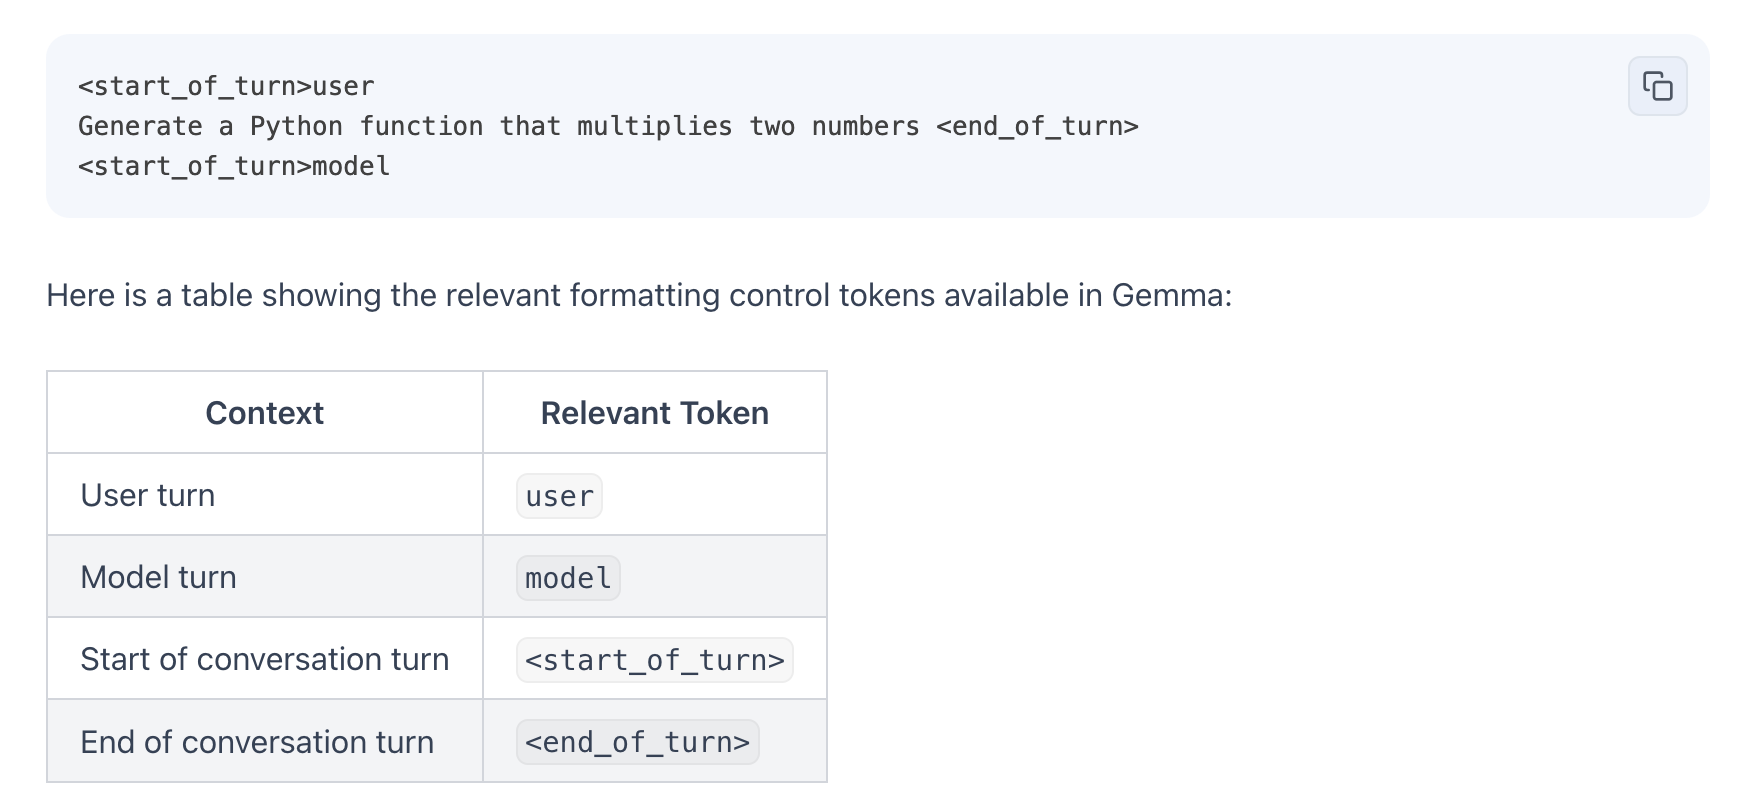

In [33]:
normal_template = """<start_of_turn>user
‰Ω†ÊòØ‰∏ÄÂÄãÂæàËÅ∞ÊòéÁöÑËê¨‰∫ãÈÄöÔºåÊìÖÈï∑ÂõûÁ≠îÂêÑÁ®ÆÂïèÈ°å„ÄÇ

ÂïèÈ°åÔºö{question}<end_of_turn>
<start_of_turn>model
Á≠îÊ°àÔºö"""

normal_prompt = PromptTemplate.from_template(normal_template)

normal_chain = (
    {"question": RunnablePassthrough()}
    | normal_prompt
    | llm
)
normal_chain.invoke("ÂíñÂï°Ë±ÜÊòØË±ÜÂ≠êÔºåÈÇ£ÂíñÂï°ÊòØË±ÜÊºøÂóé")

'ÈåØË™§ÁöÑ„ÄÇÂíñÂï°Ë±Ü‰∏çÊòØË±ÜÂ≠êÔºåËÄåÂíñÂï°ÂâáÊòØÁî±ÂíñÂï°Ë±ÜË£ΩÊàêÁöÑ„ÄÇÂíñÂï°‰∏¶ÈùûË±ÜÊºø„ÄÇ'

## Few-shot

In [34]:
fewshot_template = """<start_of_turn>user
‰Ω†ÊòØ‰∏ÄÂÄãÂæàËÅ∞ÊòéÁöÑËê¨‰∫ãÈÄöÔºåÊìÖÈï∑ÂõûÁ≠îÂêÑÁ®ÆÂïèÈ°å„ÄÇ

‰ª•‰∏ãÁÇ∫‰∏Ä‰∫õ‰æãÂ≠êÔºö
```
ÂïèÈ°åÔºöÂ≠∏Ê≥ïÂæãÁöÑÁÇ∫ÁîöÈ∫ºÂè´ÂæãÂ∏´Ôºå‰∏çÂè´Ê≥ïÂ∏´Ôºü
Á≠îÊ°àÔºöÂõ†ÁÇ∫Ê≥ïÂ∏´ÊòØ‰ΩøÁî®È≠îÊ≥ïÁöÑ‰∫∫

ÂïèÈ°åÔºöÁõ£ÁçÑË£°ÈÉΩÊòØÁäØ‰∫∫ÔºåÁÇ∫ÁîöÈ∫ºË≠¶ÂØü‰∏çÂéªË£°Èù¢ÊäìÁäØ‰∫∫Ôºü
Á≠îÊ°àÔºöÂõ†ÁÇ∫‰ªñÂÄëÂ∑≤Á∂ìË¢´ÊäìÈÅéÊâçÈÄ≤ÂéªÁöÑ
```

ÁèæÂú®Ë´ãÂõûÁ≠î‰ª•‰∏ãÂïèÈ°å
ÂïèÈ°åÔºö{question}<end_of_turn>
<start_of_turn>model
Á≠îÊ°àÔºö"""

fewshot_prompt = PromptTemplate.from_template(fewshot_template)

fewshot_chain = (
    {"question": RunnablePassthrough()}
    | fewshot_prompt
    | llm
)
fewshot_chain.invoke("ÂíñÂï°Ë±ÜÊòØË±ÜÂ≠êÔºåÈÇ£ÂíñÂï°ÊòØË±ÜÊºøÂóé")

'ÈåØË™§ÁöÑ„ÄÇÂíñÂï°Ë±Ü‰∏çÊòØË±ÜÂ≠êÔºåËÄåÂíñÂï°ÊòØÂæûÂíñÂï°Ë±Ü‰∏≠Ë£ΩÊàêÁöÑÈ£≤Êñô„ÄÇ'

## Chain of thought(CoT)

In [35]:
CoT_template = """<start_of_turn>user
‰Ω†ÊòØ‰∏Ä‰ΩçÊï∏Â≠∏ÂÆ∂ÔºåÂ∞áÊúÉÂπ´Âä©ÂõûÁ≠îÊï∏Â≠∏ÂïèÈ°å„ÄÇ

‰ª•‰∏ãÁÇ∫‰∏Ä‰∫õ‰æãÂ≠êÔºö
```
‰æãÂ≠ê1:
ÂïèÈ°åÔºöÁï∂Êàë‰πùÊ≠≤ÁöÑÊôÇÂÄôÔºåÊàëÂºüÂºüÁöÑÂπ¥ÈΩ°ÊòØÊàëÁöÑ‰∏âÂàÜ‰πã‰∫å„ÄÇÁèæÂú®Êàë54Ê≠≤‰∫ÜÔºåÊàëÂºüÂºüÂπæÊ≠≤‰∫ÜÔºü
Á≠îÊ°àÔºöÊàëÂÄë‰∏ÄÊ≠•‰∏ÄÊ≠•‰æÜË®àÁÆó„ÄÇ

Áï∂‰Ω†‰πùÊ≠≤ÁöÑÊôÇÂÄôÔºå‰Ω†ÂºüÂºüÁöÑÂπ¥ÈΩ°ÊòØ‰Ω†ÁöÑ‰∏âÂàÜ‰πã‰∫åÔºö

‰Ω†9Ê≠≤ÊôÇÔºå‰Ω†ÂºüÂºüÊòØ 9x(2/3) = 6Ê≠≤„ÄÇ
ÁèæÂú®‰Ω†54Ê≠≤‰∫ÜÔºö

‰Ω†ÊØîÁï∂ÊôÇÂ§ß‰∫Ü45Ê≠≤Ôºà54 - 9 = 45Ôºâ„ÄÇ
Âõ†Ê≠§Ôºå‰Ω†ÂºüÂºüÁèæÂú®‰πüÊØîÁï∂ÊôÇÂ§ß‰∫Ü45Ê≠≤„ÄÇ
Ë®àÁÆó‰Ω†ÂºüÂºüÁöÑÂπ¥ÈΩ°Ôºö

‰Ω†ÂºüÂºüÁï∂ÊôÇ6Ê≠≤ÔºåÁèæÂú®‰ªñÊØîÁï∂ÊôÇÂ§ß45Ê≠≤ÔºåÊâÄ‰ª•‰ªñÁèæÂú®ÊòØ6 + 45 = 51Ê≠≤„ÄÇ
ÊâÄ‰ª•Ôºå‰Ω†ÂºüÂºüÁèæÂú®51Ê≠≤„ÄÇ


‰æãÂ≠ê2:
ÂïèÈ°åÔºöÁï∂ÊàëÂÖ´Ê≠≤ÁöÑÊôÇÂÄôÔºåÊàëÂ¶πÂ¶πÁöÑÂπ¥ÈΩ°ÊòØÊàëÁöÑÂõõÂàÜ‰πã‰∏Ä„ÄÇÁèæÂú®Êàë48Ê≠≤‰∫ÜÔºåÊàëÂ¶πÂ¶πÂπæÊ≠≤‰∫ÜÔºü
Á≠îÊ°àÔºö
ÊàëÂÄë‰∏ÄÊ≠•‰∏ÄÊ≠•‰æÜË®àÁÆó„ÄÇ

Áï∂‰Ω†ÂÖ´Ê≠≤ÁöÑÊôÇÂÄôÔºå‰Ω†Â¶πÂ¶πÁöÑÂπ¥ÈΩ°ÊòØ‰Ω†ÁöÑÂõõÂàÜ‰πã‰∏ÄÔºö

‰Ω†8Ê≠≤ÊôÇÔºå‰Ω†Â¶πÂ¶πÊòØ 8*(1/4)=2 Ê≠≤„ÄÇ
ÁèæÂú®‰Ω†48Ê≠≤‰∫ÜÔºö

‰Ω†ÊØîÁï∂ÊôÇÂ§ß‰∫Ü40Ê≠≤Ôºà48 - 8 = 40Ôºâ„ÄÇ
Âõ†Ê≠§Ôºå‰Ω†Â¶πÂ¶πÁèæÂú®‰πüÊØîÁï∂ÊôÇÂ§ß‰∫Ü40Ê≠≤„ÄÇ
Ë®àÁÆó‰Ω†Â¶πÂ¶πÁöÑÂπ¥ÈΩ°Ôºö

‰Ω†Â¶πÂ¶πÁï∂ÊôÇ2Ê≠≤ÔºåÁèæÂú®Â•πÊØîÁï∂ÊôÇÂ§ß40Ê≠≤ÔºåÊâÄ‰ª•Â•πÁèæÂú®ÊòØ2 + 40 = 42Ê≠≤„ÄÇ
```

ÁèæÂú®Ë´ãÂõûÁ≠î‰ª•‰∏ãÂïèÈ°å
ÂïèÈ°åÔºö{question}<end_of_turn>
<start_of_turn>model
Á≠îÊ°àÔºö"""

CoT_prompt = PromptTemplate.from_template(CoT_template)

CoT_chain = (
    {"question": RunnablePassthrough()}
    | CoT_prompt
    | llm
)
CoT_chain.invoke("Áï∂ÊàëÂÖ≠Ê≠≤ÁöÑÊôÇÂÄôÔºåÊàëÂ¶πÂ¶πÁöÑÂπ¥ÈΩ°Âè™ÊúâÊàëÁöÑ‰∏ÄÂçä„ÄÇ ÁèæÂú®Êàë70Ê≠≤‰∫ÜÔºåÊàëÂ¶πÂ¶πÂπæÊ≠≤‰∫ÜÔºü")

'\n\nÊàëÂÄë‰∏ÄÊ≠•‰∏ÄÊ≠•‰æÜË®àÁÆó„ÄÇ\n\nÁï∂‰Ω†ÂÖ≠Ê≠≤ÁöÑÊôÇÂÄôÔºå‰Ω†Â¶πÂ¶πÁöÑÂπ¥ÈΩ°ÊòØ‰Ω†ÁöÑ‰∏ÄÂçäÔºö\n\n‰Ω†6Ê≠≤ÊôÇÔºå‰Ω†Â¶πÂ¶πÊòØ 6/2 = 3Ê≠≤„ÄÇ\nÁèæÂú®‰Ω†70Ê≠≤‰∫ÜÔºö\n\n‰Ω†ÊØîÁï∂ÊôÇÂ§ß‰∫Ü64Ê≠≤Ôºà70 - 6 = 64Ôºâ„ÄÇ\nÂõ†Ê≠§Ôºå‰Ω†Â¶πÂ¶πÁèæÂú®‰πüÊØîÁï∂ÊôÇÂ§ß‰∫Ü64Ê≠≤„ÄÇ\nË®àÁÆó‰Ω†Â¶πÂ¶πÁöÑÂπ¥ÈΩ°Ôºö\n\n‰Ω†Â¶πÂ¶πÁï∂ÊôÇ3Ê≠≤ÔºåÁèæÂú®Â•πÊØîÁï∂ÊôÇÂ§ß64Ê≠≤ÔºåÊâÄ‰ª•Â•πÁèæÂú®ÊòØ3 + 64 = 67Ê≠≤„ÄÇ\n\nÊâÄ‰ª•Ôºå‰Ω†Â¶πÂ¶πÁèæÂú®67Ê≠≤„ÄÇ'

ÂèØ‰ª•ÁúãÂà∞Áî®‰∏âÊ¨°Á≠îÊ°àÁÇ∫ 50ÔºåÂÖ©Ê¨°ÁÇ∫ 40Ôºåself-consistency ÁµêÊûúÁÇ∫ 50„ÄÇ

Ëº∏Âá∫Â§ßÈÉ®ÂàÜÈÇÑÊòØÈåØÁöÑÔºåÊàëÂÄëÁúãÁúã CoT+self-consistency

ÂèØ‰ª•ÁúãÂà∞ self-consistency Ë∑ü CoT ÁµêÂêà‰∏ÄËµ∑‰ΩøÁî®ÊïàÊûúÂæàÂ•ΩÔºå‰∫îÊ¨°ÈÉΩÁÇ∫ 67ÔºåÁµêÊûúÁÇ∫ 67

# 3. Ë≥áÊñôÈõÜÂØ¶‰Ωú Information Extraction (Tagging)
- https://python.langchain.com/docs/use_cases/tagging/

In [39]:
# ËÆÄÂÖ•‰∏≠ÊñáÁ§∫ÁØÑË≥áÊñôÈõÜ
origin_data = pd.read_csv('/content/drive/MyDrive/w12_13/Dcard_Travel_Koren.csv')
origin_data.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

clear_df = origin_data.copy()

#ÂéªÈô§Êú¨Ê¨°‰∏çÊúÉÁî®Âà∞ÁöÑÊ¨Ñ‰Ωç
drop_cols = ['boardID', 'commentCount', 'department', 'gender', 'school', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#ÂéªÈô§ÊñáÁ´†ÂÖßÂÆπÁÇ∫Á©∫ÂÄºÁöÑÁ≠ÜÊï∏
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#Êñ∞Â¢û['sentence']Ê¨Ñ‰ΩçÔºåÁî®'„ÄÇ'Âèñ‰ª£'\n\n'Ôºå‰∏¶ÁßªÈô§'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','„ÄÇ', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#ÁßªÈô§ÂÖßÊñá‰∏≠ÁöÑÁ∂≤ÂùÄ
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df['sentence'] = clear_df['sentence'].str.split("[,Ôºå„ÄÇÔºÅ!Ôºü?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)
# ÊääÈï∑Â∫¶Â∞èÊñº1ÁöÑsentenceÂà™Êéâ
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sampled_df = sent_df.sample(n=100, random_state=222)

sampled_df

system_id                                     artUrl  \
4739         159  https://www.dcard.tw/f/travel/p/254417196   
15005        450  https://www.dcard.tw/f/travel/p/255172329   
15393        463  https://www.dcard.tw/f/travel/p/255064886   
2568          68  https://www.dcard.tw/f/travel/p/254467834   
4933         168  https://www.dcard.tw/f/travel/p/254827687   
...          ...                                        ...   
14476        430  https://www.dcard.tw/f/travel/p/254679386   
4556         152  https://www.dcard.tw/f/travel/p/254328196   
3364         101  https://www.dcard.tw/f/travel/p/254576754   
10872        329  https://www.dcard.tw/f/travel/p/254717920   
11146        338  https://www.dcard.tw/f/travel/p/254682580   

                   artDate                                          artTitle  \
4739   2024-01-14 13:24:35                                 #ÂúãÂ§ñ Á¨¨‰∏ÄÊ¨°Áç®ÊóÖÂ§ßÈÇ±ÈáúÂ±±Day3   
15005  2024-04-04 14:09:01                 #ÂúãÂ§ñÈÅäË®ò #ÂàÜ‰∫´ #ÈüìÂúã ‰∫§ÊèõÁîüÁöÑÂÖ®Â∑ûÂÖ©Â§©‰∏ÄÂ§úÂ∞èÊóÖË°åüá∞üá∑ÔºàÂúñÂ§öÔºâ   
15393  2024-03-24 09:49:29                             #ÂúãÂ§ñÈÅäË®ò ÂçÅÂ§©ÊòüÈ¶¨Ë°åÁé©‰ªÄÈ∫º - Êñ∞Âä†Âù°ÁØá   
2568   2024-01-20 09:16:54                                 #ÂúãÂ§ñ üá∞üá∑ÊøüÂ∑ûÂ≥∂Ëá™ÈßïËá™Áî±Ë°åÔºà‰∏ãÔºâ   
4933   2024-02-29 10:40:14  #ÂúãÂ§ñÈÅäË®ò Êó•Êú¨Êù±ÂåóËóèÁéãÊªëÈõ™üèÇ„ÄÅÂåóÊµ∑ÈÅìÊªëÈõ™‚õ∑Ô∏èÁßÅ‰∫∫‰∏≠ÊñáÊïôÁ∑¥Ë™≤ÂàÜ‰∫´ÔºàÂê´Â∞èÂèÆÂôπÂñÆÊùø„ÄÅÈõôÊùøÂúòÈ´îË™≤ÂàÜ‰∫´Ôºâ   
...                    ...                                               ...   
14476  2024-02-15 05:59:21                 #ÂúãÂ§ñ #ÂæµÊóÖ‰º¥ #ÈüìÂúã 2/16-2/24ÂêÉÂñùÁé©inÂ§ßÈÇ±È¶ñÁàæÈáúÂ±±   
4556   2024-01-04 11:07:41                                #ÂÖ∂‰ªñ #ÈÇ£‰∫õÂπ¥ÔºåÊàëÂÄë‰∏ÄËµ∑Á¥ÑÈÅéÁöÑÊóÖ‰º¥   
3364   2024-02-01 10:23:19                                   #ÂúãÂ§ñ Êó•Êú¨Á¶èÂ≤°Ë≥ºÁâ©Ë∂ÖÁîúÂ§ßÂêàËºØ   
10872  2024-02-19 09:12:14                               #ÂúãÂ§ñ ÂæµÊóÖ‰º¥ ‰∏çÈôêÂúãÂÆ∂ Èï∑ÊúüÊâæÊóÖ‰º¥üå∏   
11146  2024-02-15 12:45:38                        #ÂúãÂ§ñ #ÂúãÂ§ñÈüìÂúãÈ¶ñÁàæ6Â§©4Â§úÔºåÊ©ü+ÈÖíÂè™Ë¶Å‰∏ÄËê¨‰∫î‚ÄºÔ∏è   

                                              artContent  \
4739   Day 3\n\nÁ¨¨‰∫åÂ§©Êôö‰∏äÂèã‰∫∫ÂæóÁü•ÊàëÁç®ÊóÖ‰æÜÈüìÂúãË™™ÁÇ∫‰Ωï‰∏çÊè™Â•πÊÉ≥‰æÜÂêÉÈÜ¨Ëüπü¶ÄÔ∏èÊàë‰πüÊòØË∂ÖÊÑõÈÜ¨ËüπÔºåÁï∂...   
15005  Â§ßÂÆ∂ÂÆâÂ¶ûüëãÊàëÊòØÈú≤Èú≤ÔΩûÂéªÂπ¥Âú®ÈüìÂúã‰∫§Êèõ‰∫ÜÂçäÂπ¥ÔºåÂâçÂπæÂ§©Ââ™‰∫ÜÁï∂ÊôÇÂéªÂÖ®Â∑ûÊóÖË°åÁöÑvlog‰πãÂæåË¶∫ÂæóÈùûÂ∏∏Êá∑Âøµ...   
15393  ‚ÄºÔ∏èÊ≠§ÁØáË°åÁ®ãÈùûÂ§ßÁúæË∑ØÁ∑öÔºåË´ãÂ∞èÂøÉÊúçÁî®„ÄÇÈ†ÜÂ∫èË®ò‰∫ãÔºåÈªûÂà∞ÈªûÁßªÂãïÈÉΩÊòØÊê≠Grab\n\n\nDay 1...   
2568   https://www.dcard.tw/f/travel/p/254458511?cid=...   
4933   ÂéªÂπ¥ÂéªÂåóÊµ∑ÈÅìkiroroÊªëÈõ™ÔºåÊªëÂÆåË¶∫ÂæóÊÑõ‰∏äÊªëÈõ™XD\nÊªëÂÆåÈ¶¨‰∏äÊ±∫ÂÆö‰ªäÂπ¥Èõ™Â≠£‰∏ÄÂÆöË¶ÅÂÜçÂéªÊªëÈõ™‰∏ÄÊ¨°...   
...                                                  ...   
14476  Â¶ÇÈ°åÔºå\n2/16-2/18Âú®Â§ßÈÇ±\n2/18-2/20Âú®È¶ñÁàæ\n2/21-2/24Âú®ÈáúÂ±± ...   
4556   ÊõæÁ∂ìÊàëË¶∫ÂæóÔºåÊóÖË°åÊòØÈúÄË¶ÅÊâæ‰∫∫‰∏ÄËµ∑ÁöÑ„ÄÇÊõæÁ∂ìÁöÑÊàë‰πüË¶∫ÂæóÔºåÁ¥ÑÂá∫ÂéªÁé©Â∞±ÊòØÂñÆÁ¥îÂêÑÈ°ßÂêÑÁöÑÔºåÊØèÂÄã‰∫∫ÁÇ∫Ëá™Â∑±Ë≤†Ë≤¨...   
3364   Êó•Êú¨Á¶èÂ≤°Ë≤∑Ë≤∑Êó•Ë®òpart2~\nÈÄôÊ¨°Âéª‰∫ÜÁî±Â∏ÉÈô¢ÂíåÁ¶èÂ≤°ÔºåÁúüÂøÉÂñúÊ≠°Áî±Â∏ÉÈô¢ÁöÑÊ∞õÂúçÔºåÂæàÊÇ†ÂìâÊ≥°Ê∫´Ê≥âÂæàËàí...   
10872  #ÈáçÁôºÔºåÂ∏≥ËôüË¢´bang‰∫Ü ÊàëÂè™Â•ΩÁî®ÊúãÂèãÁöÑÂÜçÁôº‰∏ÄÊ¨°üò≠\n\nÂó®Âó®ÔºåÊàëÊòØ‰πãÂâç‰∏ÄÁõ¥Âú®Ê≠êÊ¥≤ÁîüÊ¥ªÁöÑÁïôÂ≠∏...   
11146  \n\n\n\n\n\n\n\nÈüìÂúã6Â§©4Â§úÔºåÊ©ü+ÈÖíÂè™Ë¶Å‰∏ÄËê¨‰∫î‚ÄºÔ∏è\n\nÂ§ßÂÆ∂Â•ΩÊàëÊòØÂ∞èÂº±ËÇåüí™...   

                                                sentence  
4739                           ÂâõÂâõÂêÉ‰∫ÜÂÖ©Â∞èÊôÇü§£Ë¶ÅÈõ¢ÈñãÈáúÂ±±‰∫ÜÔΩûÂÜíËëóÊâãËß£ÂáçÂÜç‰æÜÊôÉÊôÉÔΩû  
15005                   ‰æÜ‰∫ÜÂÖ®Â∑ûÊÄéÈ∫ºÂèØ‰ª•‰∏çÁ©øÈüìÊúçÂë¢üòçÂü∫Êú¨‰∏äÈüìÂ±ãÊùëË£°Èù¢Âà∞ËôïÈÉΩÊòØÂá∫ÁßüÈüìÊúçÁöÑÂ∫ó  
15393                                             Â∑≤Á∂ìÂ§ßÊéíÈï∑Èæç  
2568                                            ÁúãËµ∑‰æÜ‰πüÂæàÊúâÊÑüË¶∫  
4933              ÊïôÁ∑¥Ë™™ÂàùÂ≠∏ËÄÖËÉΩÂ≠∏Âà∞C turnÂ∞±Âæà‰∏çÈåØ‰∫ÜÊàëÂÄëÈÇÑËÉΩÊúâÈÄô‰∫õÈ°çÂ§ñÁöÑÊî∂Á©´ÊòØÁúüÁöÑÂæàÈñãÂøÉ  
...   

In [40]:
class KoreaTravel(BaseModel):
    ÊÉÖÁ∑í: str = Field(..., description="Âà§Êñ∑Êï¥ÂÄãÂè•Â≠êÁ∏ΩÈ´îÁöÑÊÉÖÁ∑í„ÄÇ", enum=["Ê≠£Âêë", "‰∏≠ÊÄß", "Ë≤†Âêë"])
    ÊóÖÈÅäÊôØÈªû: str = Field(
        ...,
        description="ÂàóÂá∫ÊâÄÊúâÂè•Â≠ê‰∏≠ÊèêÂèäÁöÑÈüìÂúãÊóÖÈÅäÊôØÈªû‰∏¶‰ª•ÈÄóËôü','ÂàÜÈöî„ÄÇ"
    )
    ÊôØÈªûÁ®ÆÈ°û: str = Field(
        ...,
        description="Âà§Êñ∑Âè•Â≠ê‰∏≠ÊèêÂà∞ÁöÑÊôØÈªûÊòØÂ±¨Êñº‰ªÄÈ∫ºÁ®ÆÈ°ûÁöÑ„ÄÇ",
        enum=["Ê≠∑Âè≤", "Ëá™ÁÑ∂", "ÊñáÂåñ", "ÈÉΩÂ∏Ç", "Â®õÊ®Ç", "Ë≥ºÁâ©", "ÂÖ∂‰ªñ", "ÁÑ°"],
    )

travel_parser = JsonOutputParser(pydantic_object=KoreaTravel)

# ÈÄèÈÅé get_format_instructions() ÂèØ‰ª•ÁúãÂà∞Â¶Ç‰ΩïÂëäË®¥ LLM ÁîüÊàêÊàëÂÄëÊÉ≥Ë¶ÅÁöÑÊ†ºÂºèÁöÑ‰∏Ä‰∫õÊåá‰ª§
travel_parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"\\u60c5\\u7dd2": {"title": "\\u60c5\\u7dd2", "description": "\\u5224\\u65b7\\u6574\\u500b\\u53e5\\u5b50\\u7e3d\\u9ad4\\u7684\\u60c5\\u7dd2\\u3002", "enum": ["\\u6b63\\u5411", "\\u4e2d\\u6027", "\\u8ca0\\u5411"], "type": "string"}, "\\u65c5\\u904a\\u666f\\u9ede": {"title": "\\u65c5\\u904a\\u666f\\u9ede", "description": "\\u5217\\u51fa\\u6240\\u6709\\u53e5\\u5b50\\u4e2d\\u63d0\\u53ca\\u7684\\u97d3\\u570b\\u65c5\\u904a\\u666f\\u9ede\\u4e26\\u4ee5\\u9017\\u865f\',\'\\u5206\\u9694\\u3002", "type": "string"}, "\\u666f\\u9ede

In [41]:
# Set up a parser + inject instructions into the prompt template.
travel_parser = JsonOutputParser(pydantic_object=KoreaTravel)

travel_template = """<start_of_turn>user
‰Ω†ÊòØ‰∏Ä‰ΩçÊóÖÈÅäË©ïË´ñÂÆ∂Ôºå‰Ω†Â∞áÊúÉÁúãÁ∂≤Ë∑Ø‰∏äÂ∞çÊñºÈüìÂúãÊóÖÈÅäÊôØÈªûÁöÑË©ïË´ñÔºåË´ãÊäìÂèñÂá∫Ë©ïË´ñ‰∏≠Ôºö
1.Ê≠§Ë©ïË´ñÁöÑÊÉÖÁ∑íÔºåÊ≠£ÂêëÊàñË≤†ÂêëÊàñ‰∏≠ÊÄß
2.ÊúâË®éË´ñÂà∞Âì™‰∫õÈüìÂúãÊóÖÈÅäÊôØÈªûÔºå‰æãÂ¶ÇÔºöÊôØÁ¶èÂÆÆ„ÄÅÂçóÂ±±Â°î„ÄÅÂºòÂ§ß
3.ÊôØÈªûÁöÑÁ®ÆÈ°ûÔºå‰æãÂ¶ÇÔºöÊ≠∑Âè≤„ÄÅËá™ÁÑ∂„ÄÅÊñáÂåñ

‰ª•‰∏ãÁÇ∫‰∏Ä‰∫õÁØÑ‰æãÔºö
```
ÁØÑ‰æã1
Âè•Â≠êÔºöÊôØÁ¶èÂÆÆÁúüÊòØÂ§™Áæé‰∫ÜÔºåÂÖÖÊªø‰∫ÜÊ≠∑Âè≤ÁöÑÊ∞£ÊÅØ„ÄÇ
ÊäìÂèñÁµêÊûúÔºö{{
‚ÄúÊÉÖÁ∑í‚Äù:‚ÄúÊ≠£Âêë‚Äù,
‚ÄúÊóÖÈÅäÊôØÈªû‚Äù:‚ÄúÊôØÁ¶èÂÆÆ‚Äù,
‚ÄúÊôØÈªûÁ®ÆÈ°û‚Äù:‚ÄúÊ≠∑Âè≤‚Äù
}}

ÁØÑ‰æã2
Âè•Â≠êÔºöÂçóÂ±±Â°îÁöÑÂ§úÊôØÁúüÊòØ‰ª§‰∫∫È©öÂòÜ„ÄÇ
ÊäìÂèñÁµêÊûúÔºö{{
‚ÄúÊÉÖÁ∑í‚Äù:‚ÄúÊ≠£Âêë‚Äù,
‚ÄúÊóÖÈÅäÊôØÈªû‚Äù:‚ÄúÂçóÂ±±Â°î‚Äù,
‚ÄúÊôØÈªûÁ®ÆÈ°û‚Äù:‚ÄúÈÉΩÂ∏Ç‚Äù
}}

ÁØÑ‰æã3
Âè•Â≠êÔºöÈÄôÊ¨°ÂéªÈüìÂúãÁöÑÊóÖË°åÁúüÊòØ‰ª§‰∫∫Â§±Êúõ„ÄÇ
ÊäìÂèñÁµêÊûúÔºö{{
‚ÄúÊÉÖÁ∑í‚Äù:‚ÄúË≤†Âêë‚Äù,
‚ÄúÊóÖÈÅäÊôØÈªû‚Äù:‚ÄúÁÑ°‚Äù,
‚ÄúÊôØÈªûÁ®ÆÈ°û‚Äù:‚ÄúÁÑ°‚Äù
}}

ÁØÑ‰æã4
Âè•Â≠êÔºöÂºòÂ§ßÈôÑËøëÊúâÂæàÂ§öÂ•ΩÁé©ÁöÑÂú∞ÊñπÂíåÁæéÈ£ü„ÄÇ
ÊäìÂèñÁµêÊûúÔºö{{
‚ÄúÊÉÖÁ∑í‚Äù:‚ÄúÊ≠£Âêë‚Äù,
‚ÄúÊóÖÈÅäÊôØÈªû‚Äù:‚ÄúÂºòÂ§ß‚Äù,
‚ÄúÊôØÈªûÁ®ÆÈ°û‚Äù:‚ÄúÂ®õÊ®Ç‚Äù
}}


{format_instructions}
Ë´ã‰ΩøÁî®ÁπÅÈ´î‰∏≠ÊñáÂõûÁ≠î„ÄÇ
Èô§‰∫Ü JSON ÂÖßÂÆπÂ§ñÔºå‰∏çË¶ÅÂõûÁ≠î‰ªª‰ΩïÂÖ∂‰ªñÂÖßÂÆπ

ÁèæÂú®Ë´ãÂπ´ÊàëÊäìÂèñ‰ª•‰∏ãÂè•Â≠êÁöÑË≥áË®äÔºö
Âè•Â≠êÔºö{query}
ÊäìÂèñÁµêÊûúÔºö<end_of_turn>
<start_of_turn>model
"""

travel_prompt = PromptTemplate(
    template=travel_template,
    input_variables=["query"],
    partial_variables={"format_instructions": travel_parser.get_format_instructions()},
)

chain = travel_prompt | llm
chain.get_graph().print_ascii()

       +-------------+         
       | PromptInput |         
       +-------------+         
              *                
              *                
              *                
      +----------------+       
      | PromptTemplate |       
      +----------------+       
              *                
              *                
              *                
   +---------------------+     
   | HuggingFaceEndpoint |     
   +---------------------+     
              *                
              *                
              *                
+---------------------------+  
| HuggingFaceEndpointOutput |  
+---------------------------+  


ÊâãÂãïÂª∫Á´ã parse function

In [42]:
# Âæû json Â≠ó‰∏≤‰∏≠ÊäìÂèñÁ≠îÊ°à
def extract_answer_from_string(string_):
    string_ = string_.replace("\n", "")
    string_ = string_.replace("json", "")
    string_ = string_.replace("    ", "")
    string_ = string_.replace("```", "")
    try:
        # ÂèØ‰ª•ÊàêÂäüËΩâÊèõ
        dict_result = json.loads(string_)
    except:
        print(string_)
        return string_
    return dict_result

# Âæû dict ÊäìÂèñÊÉÖÁ∑í
def get_sentiment(row):
    sentiment = None
    if isinstance(row, dict):
        if ("ÊÉÖÁ∑í" in row.keys()):
            sentiment = row['ÊÉÖÁ∑í']
    return sentiment

In [43]:
llm_result = extract_answer_from_string(chain.invoke({"query": "ÊôØÁ¶èÂÆÆÂ•ΩÂ•ΩÂêÉ"}))
print(llm_result)
get_sentiment(llm_result)

{'ÊÉÖÁ∑í': 'Ê≠£Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÊôØÁ¶èÂÆÆ', 'ÊôØÈªûÁ®ÆÈ°û': 'Ê≠∑Âè≤'}


'Ê≠£Âêë'

In [44]:
sampled_df['LLM'] = sampled_df.apply(lambda x: extract_answer_from_string(chain.invoke({"query": x['sentence']})), axis=1)
sampled_df

Ë©≤Âè•Â≠ê‰∏¶ÈùûÂåÖÂê´Â∞çÊóÖÈÅäÊôØÈªûÊàñÊÉÖÁ∑íÁöÑË®éË´ñÔºåÂõ†Ê≠§ÁÑ°Ê≥ïÊäìÂèñÊâÄÈúÄË≥áË®ä„ÄÇ
ÁÑ°Ê≥ïÂæûÊâÄÊèê‰æõ‰πãÂè•Â≠ê‰∏≠ÊäìÂèñÊâÄÈúÄË≥áË®äÔºåÂõ†ÁÇ∫Ë©≤Âè•Â≠ê‰∏¶Êú™ÂåÖÂê´ËàáÈüìÂúãÊóÖÈÅäÊôØÈªûÁõ∏ÈóúÁöÑË≥áË®ä„ÄÇ
Ê≤íÊúâÊèê‰æõÂè•Â≠êÔºåÂõ†Ê≠§ÁÑ°Ê≥ïÊäìÂèñË≥áË®ä„ÄÇ
Ê≠§Âè•Â≠ê‰∏¶Êú™ÂåÖÂê´Â∞çÈüìÂúãÊóÖÈÅäÊôØÈªûÁöÑË©ïË´ñÔºåÂõ†Ê≠§ÁÑ°Ê≥ïÊ†πÊìöË¶ÅÊ±ÇÊäìÂèñÁõ∏ÈóúË≥áË®ä„ÄÇ
The provided sentence is not included in the given context, so I am unable to extract the requested information.
Ê≠§Âè•Â≠êÁöÑÊÉÖÁ∑í„ÄÅÊóÖÈÅäÊôØÈªûÂíåÊôØÈªûÁ®ÆÈ°ûÁÑ°Ê≥ïÂæûÊèê‰æõÁöÑ‰ø°ÊÅØ‰∏≠Êì∑Âèñ„ÄÇÂõ†Ê≠§ÔºåÊàëÁÑ°Ê≥ïÊèê‰æõÊäìÂèñÁµêÊûú„ÄÇ


system_id                                     artUrl  \
4739         159  https://www.dcard.tw/f/travel/p/254417196   
15005        450  https://www.dcard.tw/f/travel/p/255172329   
15393        463  https://www.dcard.tw/f/travel/p/255064886   
2568          68  https://www.dcard.tw/f/travel/p/254467834   
4933         168  https://www.dcard.tw/f/travel/p/254827687   
...          ...                                        ...   
14476        430  https://www.dcard.tw/f/travel/p/254679386   
4556         152  https://www.dcard.tw/f/travel/p/254328196   
3364         101  https://www.dcard.tw/f/travel/p/254576754   
10872        329  https://www.dcard.tw/f/travel/p/254717920   
11146        338  https://www.dcard.tw/f/travel/p/254682580   

                   artDate                                          artTitle  \
4739   2024-01-14 13:24:35                                 #ÂúãÂ§ñ Á¨¨‰∏ÄÊ¨°Áç®ÊóÖÂ§ßÈÇ±ÈáúÂ±±Day3   
15005  2024-04-04 14:09:01                 #ÂúãÂ§ñÈÅäË®ò #ÂàÜ‰∫´ #ÈüìÂúã ‰∫§ÊèõÁîüÁöÑÂÖ®Â∑ûÂÖ©Â§©‰∏ÄÂ§úÂ∞èÊóÖË°åüá∞üá∑ÔºàÂúñÂ§öÔºâ   
15393  2024-03-24 09:49:29                             #ÂúãÂ§ñÈÅäË®ò ÂçÅÂ§©ÊòüÈ¶¨Ë°åÁé©‰ªÄÈ∫º - Êñ∞Âä†Âù°ÁØá   
2568   2024-01-20 09:16:54                                 #ÂúãÂ§ñ üá∞üá∑ÊøüÂ∑ûÂ≥∂Ëá™ÈßïËá™Áî±Ë°åÔºà‰∏ãÔºâ   
4933   2024-02-29 10:40:14  #ÂúãÂ§ñÈÅäË®ò Êó•Êú¨Êù±ÂåóËóèÁéãÊªëÈõ™üèÇ„ÄÅÂåóÊµ∑ÈÅìÊªëÈõ™‚õ∑Ô∏èÁßÅ‰∫∫‰∏≠ÊñáÊïôÁ∑¥Ë™≤ÂàÜ‰∫´ÔºàÂê´Â∞èÂèÆÂôπÂñÆÊùø„ÄÅÈõôÊùøÂúòÈ´îË™≤ÂàÜ‰∫´Ôºâ   
...                    ...                                               ...   
14476  2024-02-15 05:59:21                 #ÂúãÂ§ñ #ÂæµÊóÖ‰º¥ #ÈüìÂúã 2/16-2/24ÂêÉÂñùÁé©inÂ§ßÈÇ±È¶ñÁàæÈáúÂ±±   
4556   2024-01-04 11:07:41                                #ÂÖ∂‰ªñ #ÈÇ£‰∫õÂπ¥ÔºåÊàëÂÄë‰∏ÄËµ∑Á¥ÑÈÅéÁöÑÊóÖ‰º¥   
3364   2024-02-01 10:23:19                                   #ÂúãÂ§ñ Êó•Êú¨Á¶èÂ≤°Ë≥ºÁâ©Ë∂ÖÁîúÂ§ßÂêàËºØ   
10872  2024-02-19 09:12:14                               #ÂúãÂ§ñ ÂæµÊóÖ‰º¥ ‰∏çÈôêÂúãÂÆ∂ Èï∑ÊúüÊâæÊóÖ‰º¥üå∏   
11146  2024-02-15 12:45:38                        #ÂúãÂ§ñ #ÂúãÂ§ñÈüìÂúãÈ¶ñÁàæ6Â§©4Â§úÔºåÊ©ü+ÈÖíÂè™Ë¶Å‰∏ÄËê¨‰∫î‚ÄºÔ∏è   

                                              artContent  \
4739   Day 3\n\nÁ¨¨‰∫åÂ§©Êôö‰∏äÂèã‰∫∫ÂæóÁü•ÊàëÁç®ÊóÖ‰æÜÈüìÂúãË™™ÁÇ∫‰Ωï‰∏çÊè™Â•πÊÉ≥‰æÜÂêÉÈÜ¨Ëüπü¶ÄÔ∏èÊàë‰πüÊòØË∂ÖÊÑõÈÜ¨ËüπÔºåÁï∂...   
15005  Â§ßÂÆ∂ÂÆâÂ¶ûüëãÊàëÊòØÈú≤Èú≤ÔΩûÂéªÂπ¥Âú®ÈüìÂúã‰∫§Êèõ‰∫ÜÂçäÂπ¥ÔºåÂâçÂπæÂ§©Ââ™‰∫ÜÁï∂ÊôÇÂéªÂÖ®Â∑ûÊóÖË°åÁöÑvlog‰πãÂæåË¶∫ÂæóÈùûÂ∏∏Êá∑Âøµ...   
15393  ‚ÄºÔ∏èÊ≠§ÁØáË°åÁ®ãÈùûÂ§ßÁúæË∑ØÁ∑öÔºåË´ãÂ∞èÂøÉÊúçÁî®„ÄÇÈ†ÜÂ∫èË®ò‰∫ãÔºåÈªûÂà∞ÈªûÁßªÂãïÈÉΩÊòØÊê≠Grab\n\n\nDay 1...   
2568   https://www.dcard.tw/f/travel/p/254458511?cid=...   
4933   ÂéªÂπ¥ÂéªÂåóÊµ∑ÈÅìkiroroÊªëÈõ™ÔºåÊªëÂÆåË¶∫ÂæóÊÑõ‰∏äÊªëÈõ™XD\nÊªëÂÆåÈ¶¨‰∏äÊ±∫ÂÆö‰ªäÂπ¥Èõ™Â≠£‰∏ÄÂÆöË¶ÅÂÜçÂéªÊªëÈõ™‰∏ÄÊ¨°...   
...                                                  ...   
14476  Â¶ÇÈ°åÔºå\n2/16-2/18Âú®Â§ßÈÇ±\n2/18-2/20Âú®È¶ñÁàæ\n2/21-2/24Âú®ÈáúÂ±± ...   
4556   ÊõæÁ∂ìÊàëË¶∫ÂæóÔºåÊóÖË°åÊòØÈúÄË¶ÅÊâæ‰∫∫‰∏ÄËµ∑ÁöÑ„ÄÇÊõæÁ∂ìÁöÑÊàë‰πüË¶∫ÂæóÔºåÁ¥ÑÂá∫ÂéªÁé©Â∞±ÊòØÂñÆÁ¥îÂêÑÈ°ßÂêÑÁöÑÔºåÊØèÂÄã‰∫∫ÁÇ∫Ëá™Â∑±Ë≤†Ë≤¨...   
3364   Êó•Êú¨Á¶èÂ≤°Ë≤∑Ë≤∑Êó•Ë®òpart2~\nÈÄôÊ¨°Âéª‰∫ÜÁî±Â∏ÉÈô¢ÂíåÁ¶èÂ≤°ÔºåÁúüÂøÉÂñúÊ≠°Áî±Â∏ÉÈô¢ÁöÑÊ∞õÂúçÔºåÂæàÊÇ†ÂìâÊ≥°Ê∫´Ê≥âÂæàËàí...   
10872  #ÈáçÁôºÔºåÂ∏≥ËôüË¢´bang‰∫Ü ÊàëÂè™Â•ΩÁî®ÊúãÂèãÁöÑÂÜçÁôº‰∏ÄÊ¨°üò≠\n\nÂó®Âó®ÔºåÊàëÊòØ‰πãÂâç‰∏ÄÁõ¥Âú®Ê≠êÊ¥≤ÁîüÊ¥ªÁöÑÁïôÂ≠∏...   
11146  \n\n\n\n\n\n\n\nÈüìÂúã6Â§©4Â§úÔºåÊ©ü+ÈÖíÂè™Ë¶Å‰∏ÄËê¨‰∫î‚ÄºÔ∏è\n\nÂ§ßÂÆ∂Â•ΩÊàëÊòØÂ∞èÂº±ËÇåüí™...   

                                                sentence  \
4739                           ÂâõÂâõÂêÉ‰∫ÜÂÖ©Â∞èÊôÇü§£Ë¶ÅÈõ¢ÈñãÈáúÂ±±‰∫ÜÔΩûÂÜíËëóÊâãËß£ÂáçÂÜç‰æÜÊôÉÊôÉÔΩû   
15005                   ‰æÜ‰∫ÜÂÖ®Â∑ûÊÄéÈ∫ºÂèØ‰ª•‰∏çÁ©øÈüìÊúçÂë¢üòçÂü∫Êú¨‰∏äÈüìÂ±ãÊùëË£°Èù¢Âà∞ËôïÈÉΩÊòØÂá∫ÁßüÈüìÊúçÁöÑÂ∫ó   
15393                                             Â∑≤Á∂ìÂ§ßÊéíÈï∑Èæç   
2568                                            ÁúãËµ∑‰æÜ‰πüÂæàÊúâÊÑüË¶∫   
4933              ÊïôÁ∑¥Ë™™ÂàùÂ≠∏ËÄÖËÉΩÂ≠∏Âà∞C turnÂ∞±Âæà‰∏çÈåØ‰∫ÜÊàëÂÄëÈÇÑËÉΩÊúâÈÄô‰∫õÈ°çÂ§ñÁöÑÊî∂Á©´ÊòØÁúüÁöÑÂæàÈñãÂøÉ   


In [45]:
sampled_df['sentiment'] = sampled_df.apply(lambda x: get_sentiment(x['LLM']), axis=1)
sampled_df.head()

system_id                                     artUrl  \
4739         159  https://www.dcard.tw/f/travel/p/254417196   
15005        450  https://www.dcard.tw/f/travel/p/255172329   
15393        463  https://www.dcard.tw/f/travel/p/255064886   
2568          68  https://www.dcard.tw/f/travel/p/254467834   
4933         168  https://www.dcard.tw/f/travel/p/254827687   

                   artDate                                          artTitle  \
4739   2024-01-14 13:24:35                                 #ÂúãÂ§ñ Á¨¨‰∏ÄÊ¨°Áç®ÊóÖÂ§ßÈÇ±ÈáúÂ±±Day3   
15005  2024-04-04 14:09:01                 #ÂúãÂ§ñÈÅäË®ò #ÂàÜ‰∫´ #ÈüìÂúã ‰∫§ÊèõÁîüÁöÑÂÖ®Â∑ûÂÖ©Â§©‰∏ÄÂ§úÂ∞èÊóÖË°åüá∞üá∑ÔºàÂúñÂ§öÔºâ   
15393  2024-03-24 09:49:29                             #ÂúãÂ§ñÈÅäË®ò ÂçÅÂ§©ÊòüÈ¶¨Ë°åÁé©‰ªÄÈ∫º - Êñ∞Âä†Âù°ÁØá   
2568   2024-01-20 09:16:54                                 #ÂúãÂ§ñ üá∞üá∑ÊøüÂ∑ûÂ≥∂Ëá™ÈßïËá™Áî±Ë°åÔºà‰∏ãÔºâ   
4933   2024-02-29 10:40:14  #ÂúãÂ§ñÈÅäË®ò Êó•Êú¨Êù±ÂåóËóèÁéãÊªëÈõ™üèÇ„ÄÅÂåóÊµ∑ÈÅìÊªëÈõ™‚õ∑Ô∏èÁßÅ‰∫∫‰∏≠ÊñáÊïôÁ∑¥Ë™≤ÂàÜ‰∫´ÔºàÂê´Â∞èÂèÆÂôπÂñÆÊùø„ÄÅÈõôÊùøÂúòÈ´îË™≤ÂàÜ‰∫´Ôºâ   

                                              artContent  \
4739   Day 3\n\nÁ¨¨‰∫åÂ§©Êôö‰∏äÂèã‰∫∫ÂæóÁü•ÊàëÁç®ÊóÖ‰æÜÈüìÂúãË™™ÁÇ∫‰Ωï‰∏çÊè™Â•πÊÉ≥‰æÜÂêÉÈÜ¨Ëüπü¶ÄÔ∏èÊàë‰πüÊòØË∂ÖÊÑõÈÜ¨ËüπÔºåÁï∂...   
15005  Â§ßÂÆ∂ÂÆâÂ¶ûüëãÊàëÊòØÈú≤Èú≤ÔΩûÂéªÂπ¥Âú®ÈüìÂúã‰∫§Êèõ‰∫ÜÂçäÂπ¥ÔºåÂâçÂπæÂ§©Ââ™‰∫ÜÁï∂ÊôÇÂéªÂÖ®Â∑ûÊóÖË°åÁöÑvlog‰πãÂæåË¶∫ÂæóÈùûÂ∏∏Êá∑Âøµ...   
15393  ‚ÄºÔ∏èÊ≠§ÁØáË°åÁ®ãÈùûÂ§ßÁúæË∑ØÁ∑öÔºåË´ãÂ∞èÂøÉÊúçÁî®„ÄÇÈ†ÜÂ∫èË®ò‰∫ãÔºåÈªûÂà∞ÈªûÁßªÂãïÈÉΩÊòØÊê≠Grab\n\n\nDay 1...   
2568   https://www.dcard.tw/f/travel/p/254458511?cid=...   
4933   ÂéªÂπ¥ÂéªÂåóÊµ∑ÈÅìkiroroÊªëÈõ™ÔºåÊªëÂÆåË¶∫ÂæóÊÑõ‰∏äÊªëÈõ™XD\nÊªëÂÆåÈ¶¨‰∏äÊ±∫ÂÆö‰ªäÂπ¥Èõ™Â≠£‰∏ÄÂÆöË¶ÅÂÜçÂéªÊªëÈõ™‰∏ÄÊ¨°...   

                                     sentence  \
4739                ÂâõÂâõÂêÉ‰∫ÜÂÖ©Â∞èÊôÇü§£Ë¶ÅÈõ¢ÈñãÈáúÂ±±‰∫ÜÔΩûÂÜíËëóÊâãËß£ÂáçÂÜç‰æÜÊôÉÊôÉÔΩû   
15005        ‰æÜ‰∫ÜÂÖ®Â∑ûÊÄéÈ∫ºÂèØ‰ª•‰∏çÁ©øÈüìÊúçÂë¢üòçÂü∫Êú¨‰∏äÈüìÂ±ãÊùëË£°Èù¢Âà∞ËôïÈÉΩÊòØÂá∫ÁßüÈüìÊúçÁöÑÂ∫ó   
15393                                  Â∑≤Á∂ìÂ§ßÊéíÈï∑Èæç   
2568                                 ÁúãËµ∑‰æÜ‰πüÂæàÊúâÊÑüË¶∫   
4933   ÊïôÁ∑¥Ë™™ÂàùÂ≠∏ËÄÖËÉΩÂ≠∏Âà∞C turnÂ∞±Âæà‰∏çÈåØ‰∫ÜÊàëÂÄëÈÇÑËÉΩÊúâÈÄô‰∫õÈ°çÂ§ñÁöÑÊî∂Á©´ÊòØÁúüÁöÑÂæàÈñãÂøÉ   

                                             LLM sentiment  
4739    {'ÊÉÖÁ∑í': 'Ê≠£Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÈáúÂ±±', 'ÊôØÈªûÁ®ÆÈ°û': 'ÊñáÂåñ'}        Ê≠£Âêë  
15005  {'ÊÉÖÁ∑í': 'Ê≠£Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÈüìÂ±ãÊùë', 'ÊôØÈªûÁ®ÆÈ°û': 'ÊñáÂåñ'}        Ê≠£Âêë  
15393     {'ÊÉÖÁ∑í': 'Ê≠£Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ê≠£Âêë  
2568      {'ÊÉÖÁ∑í': 'Ê≠£Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ê≠£Âêë  
4933     {'ÊÉÖÁ∑í': 'Ê≠£Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÊñáÂåñ'}        Ê≠£Âêë

In [46]:
sampled_df['sentiment'].value_counts()

sentiment
Ê≠£Âêë    73
‰∏≠ÊÄß    11
Ë≤†Âêë     9
Name: count, dtype: int64

In [47]:
# ÂÆöÁæ©ÂáΩÊï∏‰æÜÂÆâÂÖ®Âú∞ÊèêÂèñÂ≠óÂÖ∏ÂÄº
def safe_get(d, key):
    return d.get(key) if isinstance(d, dict) else None

# Â∞á LLM Â≠óÊÆµÂ±ïÈñã
sampled_df['ÊÉÖÁ∑í'] = sampled_df['LLM'].apply(lambda x: safe_get(x, 'ÊÉÖÁ∑í'))
sampled_df['ÊóÖÈÅäÊôØÈªû'] = sampled_df['LLM'].apply(lambda x: safe_get(x, 'ÊóÖÈÅäÊôØÈªû'))
sampled_df['ÊôØÈªûÁ®ÆÈ°û'] = sampled_df['LLM'].apply(lambda x: safe_get(x, 'ÊôØÈªûÁ®ÆÈ°û'))

# Ë®àÁÆóÊ≠£ÂêëÂíåË≤†ÂêëÊÉÖÁ∑íÁöÑÊôØÈªûÁµ±Ë®à
positive_df = sampled_df[sampled_df['sentiment'] == 'Ê≠£Âêë']
negative_df = sampled_df[sampled_df['sentiment'] == 'Ë≤†Âêë']

# Á¢∫‰øùÊóÖÈÅäÊôØÈªûÊòØÂ≠óÁ¨¶‰∏≤È°ûÂûã
positive_df = positive_df[positive_df['ÊóÖÈÅäÊôØÈªû'].apply(lambda x: isinstance(x, str))]
negative_df = negative_df[negative_df['ÊóÖÈÅäÊôØÈªû'].apply(lambda x: isinstance(x, str))]

positive_spots = positive_df['ÊóÖÈÅäÊôØÈªû']
negative_spots = negative_df['ÊóÖÈÅäÊôØÈªû']

positive_counts = positive_spots.value_counts()
negative_counts = negative_spots.value_counts()

In [48]:
negative_df

system_id                                     artUrl  \
6120         195  https://www.dcard.tw/f/travel/p/254815791   
5282         174  https://www.dcard.tw/f/travel/p/254826581   
15173        455  https://www.dcard.tw/f/travel/p/255178507   
11463        354  https://www.dcard.tw/f/travel/p/254728767   
6264         195  https://www.dcard.tw/f/travel/p/254815791   
9296         290  https://www.dcard.tw/f/travel/p/255215311   
11052        336  https://www.dcard.tw/f/travel/p/254695285   
14628        439  https://www.dcard.tw/f/travel/p/255138378   

                   artDate                                artTitle  \
6120   2024-02-28 09:57:41                           #ÈªëÁâπ ÈüìÂúãÈ¶ñÁàæÊªëÈõ™ÔºàÊñáÈï∑   
5282   2024-02-29 09:02:22                   #ÂúãÂ§ñÈÅäË®ò È¶ñÁàæ6Â§©5Â§úËá™Áî±Ë°åÂàÜ‰∫´Ôºà‰∏äÈõÜÔºâ   
15173  2024-04-05 09:56:40  #ÂúãÂ§ñÈÅäË®ò ÈüìÂúãËá™Áî±Ë°å5Â§©4Â§ú‰∏ãÈõÜ #ÈüìÂºèË≠â‰ª∂ÁÖß #Á∂≠‰πüÁ¥çÂíñÂï° #Ëä±Ë≤ªÁ∏ΩÊï¥ÁêÜ   
11463  2024-02-20 08:38:03                         #ÂúãÂ§ñ #È¶ñÁàæ#ÂæµÊóÖ‰º¥#Â•ΩÁõ∏Ëôï   
6264   2024-02-28 09:57:41                           #ÈªëÁâπ ÈüìÂúãÈ¶ñÁàæÊªëÈõ™ÔºàÊñáÈï∑   
9296   2024-04-09 10:52:54        #ÂúãÂ§ñÈÅäË®ò Êü¨ÂüîÂØ®ÂòéËÖ∞‰πãÊóÖ Êé¢Á¥¢‰∏âÂπ¥Ê≠ª‰∫Ü‰∏âÁôæËê¨‰∫∫ÁöÑÁ¥ÖËâ≤È´òÊ£âÊ≠∑Âè≤ÔºÅ   
11052  2024-02-17 01:49:50                        #ÂúãÂ§ñ #ÈáúÂ±± Ëµ∞ÈÄ≤Â∞èÁéãÂ≠êÁöÑ‰∏ñÁïå   
14628  2024-04-01 02:22:43                       #ÂúãÂ§ñÈÅäË®ò ÈáúÂ±±6Â§©‰∫îÂ§úËá™Áî±Ë°åÔΩû2   

                                              artContent  \
6120   ÈõôXÊóÖË°åÁ§æÔºåÈ†òÈöäÂ∞éÈÅäÂæàÁàõ\n\nË°åÁ®ã‰∫∫ÂèÉ„ÄÅ‰øùËÇù„ÄÅÂΩ©Â¶ùÔºåÊ≤íÈÅîÂà∞ÁõÆÊ®ôÔºåÂ∞±ÈóúÈñÄÁãÇÊé®Èä∑\n\nË°åÁ®ãÊï¥...   
5282   ÂâõÂ•ΩÂú®Áñ´ÊÉÖËß£Â∞Å‰πãÈöõ‰æÜÂà∞‰∫Ü‰∫∫ÁîüÈáçË¶ÅÁöÑÈáåÁ®ãÁ¢ëÔºåÊàëÁï¢Ê•≠Âï¶üéìÔºåÊâÄ‰ª•Â∞±Ë¶èÂäÉ‰∫ÜÈÄô‰∏ÄÊ¨°ÁöÑÈ¶ñÁàæ6Â§©5Â§úÁï¢Ê•≠ÊóÖ...   
15173  ‰∏ãÈõÜÈáçÈªûÊï¥ÁêÜ\nüó∫Ô∏èÊôØÈªûÔºöÈüìÂºèË≠â‰ª∂ÁÖß„ÄÅÂºòÂ§ßÈÄõË°ó\n‚òïÂíñÂï°Âª≥/ÁîúÈªûÔºöoats coffee„ÄÅc...   
11463  {ÂæµÈüìÂúãÊóÖ‰º¥}\nÊôÇÈñìÔºö6Êúà\nÂú∞ÈªûÔºöÈüìÂúãÈ¶ñÁàæ\nÈ†ê‰º∞Ë≤ªÁî®ÔºöÊ©üÂä†ÈÖíÁ¥Ñ15000-20000 ...   
6264   ÈõôXÊóÖË°åÁ§æÔºåÈ†òÈöäÂ∞éÈÅäÂæàÁàõ\n\nË°åÁ®ã‰∫∫ÂèÉ„ÄÅ‰øùËÇù„ÄÅÂΩ©Â¶ùÔºåÊ≤íÈÅîÂà∞ÁõÆÊ®ôÔºåÂ∞±ÈóúÈñÄÁãÇÊé®Èä∑\n\nË°åÁ®ãÊï¥...   
9296   Â§ßÂÆ∂Â•ΩÔºÅ\n\n‰∏âÂ§©ÈÄ£ÂÖ©ÁôºÔºÅÔºàÂÖ∂ÂØ¶ÊòØ‰∏äÁØáÊòØÊàëËß∏ÂèäÊúÄÂ∑ÆÊúÄÊ≤í‰∫∫ÊÉ≥ÁúãÁöÑ‰∏ÄÁØáÔºåÊâÄ‰ª•Áôº‰∏ÄÁØáÊñ∞ÁöÑÔºâ\n\...   
11052  \nÂá∫ÁôºÂâçÊ∫ñÂÇô\nÈüìÂúãÂÖ•Â¢ÉÈúÄË¶ÅÂÖ•Â¢ÉÂç°ÂèäÂÅ•Â∫∑ËÅ≤Êòé\nÈ£õÊ©ü‰∏äÁ©∫ÂßêÊúÉÁôºÁ¥ôÊú¨\nÂÅ•Â∫∑ËÅ≤ÊòéÂèØ‰ª•Á∂≤Ë∑ØÂ°´ÂØ´...   
14628  Á¨¨‰∏âÂ§©ÁöÑË°åÁ®ãÊòØÊàëÊúÄÔΩûÊúüÂæÖÁöÑÔºåË¶ÅÂéªÊê≠ËÜ†ÂõäÂàóËªä„ÄÇÁµêÊûú‚Ä¶.ÂúòÂèãbÊääË≠∑ÁÖßÂºÑ‰∏ü‰∫Üü•≤ÊâÄ‰ª•‰∏ÄÂ§ßÊó©ÊàëË∑üÂúòÂèãb...   

                                  sentence  \
6120                     ÊàëÂÄëÂæûÁî∑ÂªÅÈñãÈñÄÂá∫‰æÜÂ∞±ÊúâÁî∑ÁîüÂú®‰∏äÂªÅÊâÄ   
5282                          È∫µÈÇÑÊ≤í‰æÜÊàëÂ∑≤Á∂ìÂêÉÂÆå‰∏Ä‰ªΩ‰∫Ü   
15173                         ÁµÇÊñºËµ∞Âà∞ÈñÄÂè£Á´üÁÑ∂‰∏ÄÁâáÊºÜÈªë   
11463                                ‰ΩèÂÆøÈÇÑÊ≤íË®Ç   
6264                            ‰∏ÄË∑Ø‰∏ä‰πü‰∏çÊúÉÈõÜÂêàÊåáÊèÆ   
9296                                    ÂèØÊÉú   
11052  ÊåëÊà∞Ëæ£Â∫¶‰∫åÁõ¥Êé•ÂéüÂú∞ÊäïÈôçüè≥Ô∏èÈô§‰∫ÜQÂΩàÁöÑÈ≠öËÇâÈÇÑÊúÉÊúâÈ≠öÂÖßËáü‰ΩÜÊ≤íÊúâÁúãÂà∞ÂÆâÂ∫∑È≠öËÇù   
14628                              Áî∑Â•≥ÈÄ≤ÂéªÊúÉÂàÜÈñã   

                                          LLM sentiment  ÊÉÖÁ∑í ÊóÖÈÅäÊôØÈªû ÊôØÈªûÁ®ÆÈ°û  
6120   {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ë≤†Âêë  Ë≤†Âêë    ÁÑ°    ÁÑ°  
5282   {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ë≤†Âêë  Ë≤†Âêë    ÁÑ°    ÁÑ°  
15173  {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ë≤†Âêë  Ë≤†Âêë    ÁÑ°    ÁÑ°  
11463  {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ë≤†Âêë  Ë≤†Âêë    ÁÑ°    ÁÑ°  
6264   {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ë≤†Âêë  Ë≤†Âêë    ÁÑ°    ÁÑ°  
9296   {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈªû': 'ÁÑ°', 'ÊôØÈªûÁ®ÆÈ°û': 'ÁÑ°'}        Ë≤†Âêë  Ë≤†Âêë    ÁÑ°    ÁÑ°  
11052  {'ÊÉÖÁ∑í': 'Ë≤†Âêë', 'ÊóÖÈÅäÊôØÈª

<ipython-input-60-ee0037b80ad9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_counts.index, y=positive_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) 

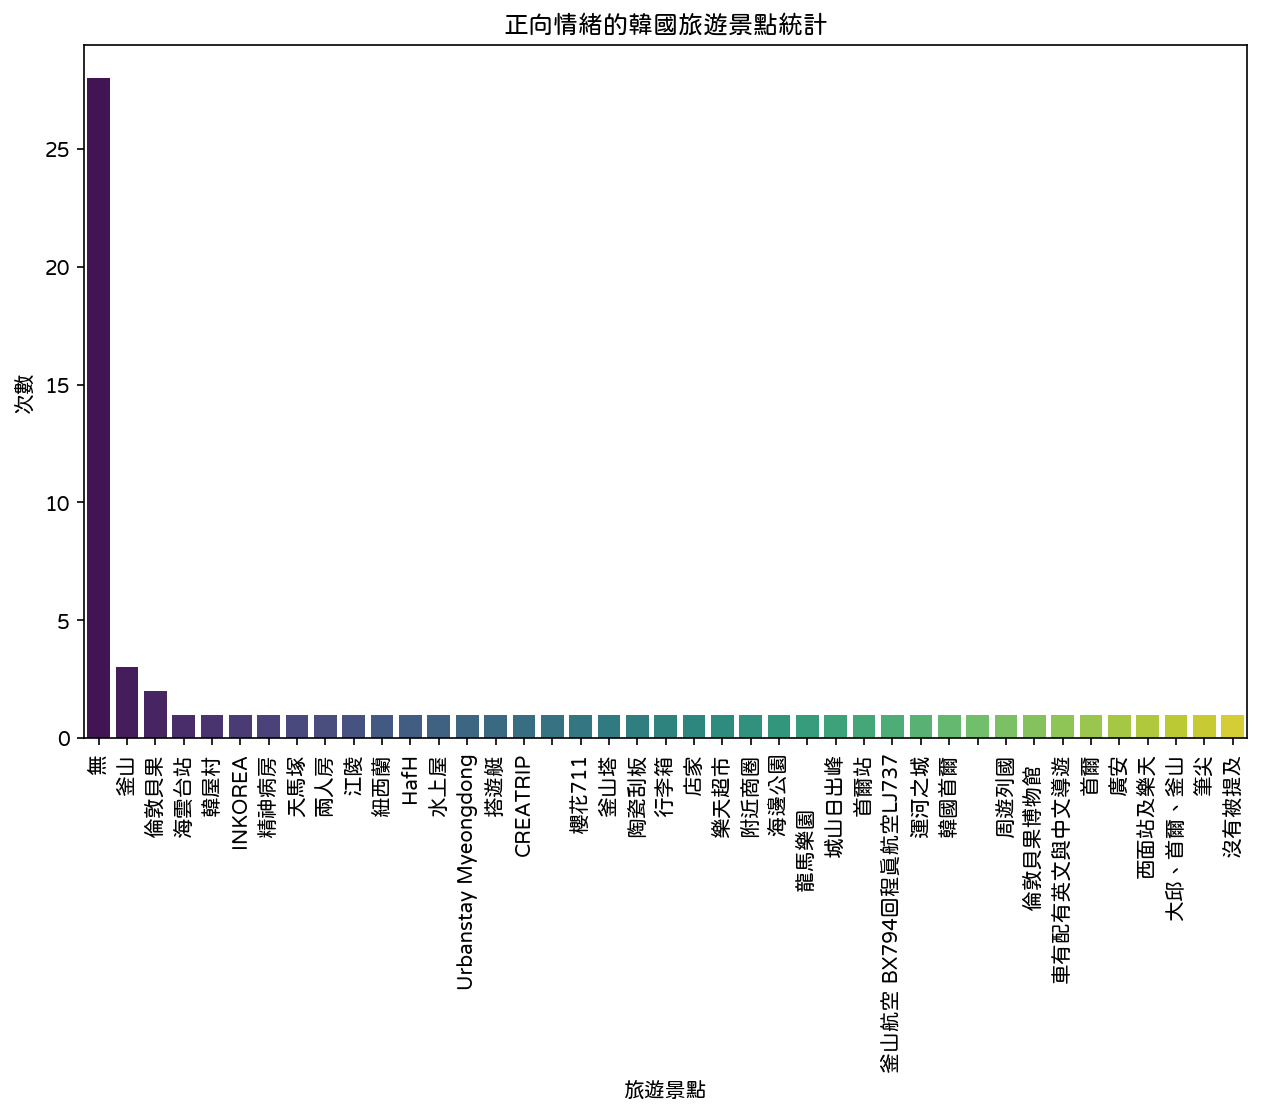

<ipython-input-60-ee0037b80ad9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_counts.index, y=negative_counts.values, palette='viridis')


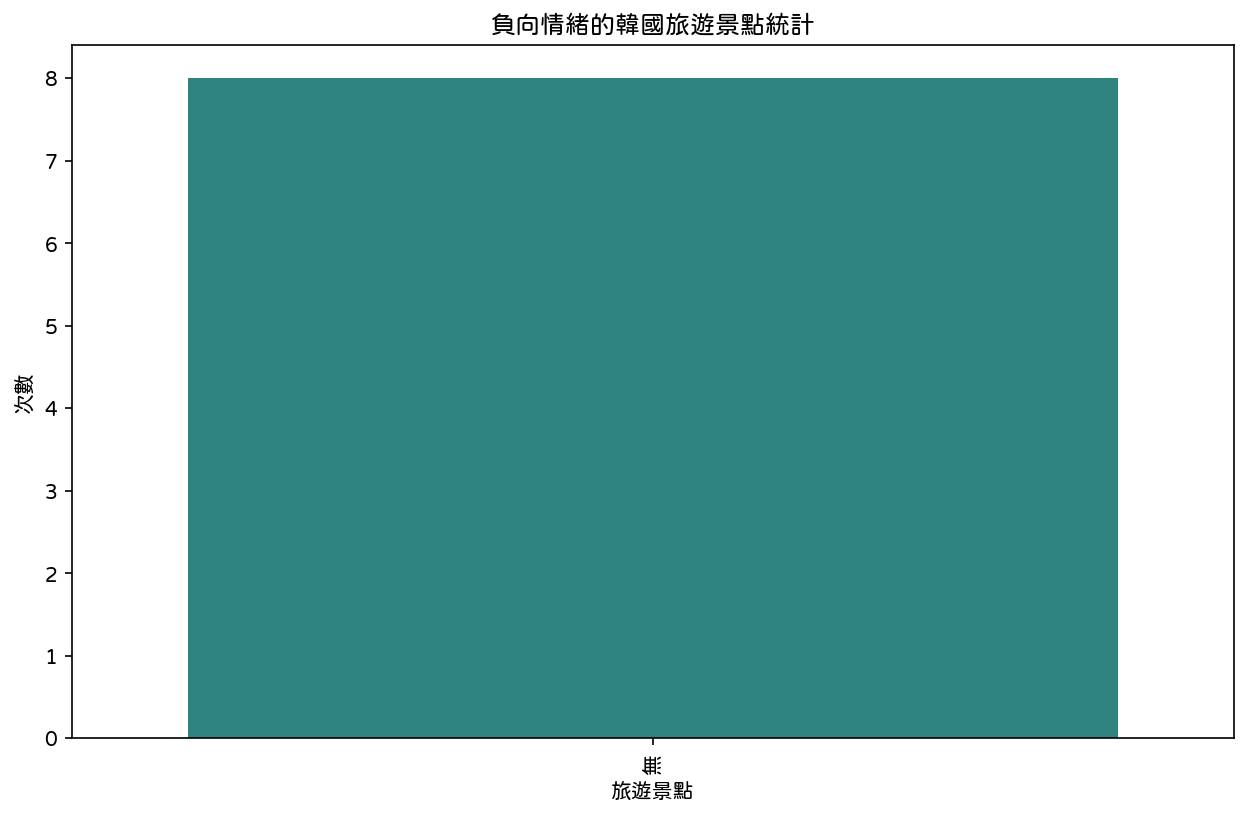

In [60]:
# Áπ™Ë£ΩÊ≠£ÂêëÊÉÖÁ∑íÁöÑÊôØÈªûÁµ±Ë®àÂúñ
sns.barplot(x=positive_counts.index, y=positive_counts.values, palette='viridis')
plt.title('Ê≠£ÂêëÊÉÖÁ∑íÁöÑÈüìÂúãÊóÖÈÅäÊôØÈªûÁµ±Ë®à')
plt.xlabel('ÊóÖÈÅäÊôØÈªû')
plt.ylabel('Ê¨°Êï∏')
plt.xticks(rotation=90)
plt.show()

# Áπ™Ë£ΩË≤†ÂêëÊÉÖÁ∑íÁöÑÊôØÈªûÁµ±Ë®àÂúñ
sns.barplot(x=negative_counts.index, y=negative_counts.values, palette='viridis')
plt.title('Ë≤†ÂêëÊÉÖÁ∑íÁöÑÈüìÂúãÊóÖÈÅäÊôØÈªûÁµ±Ë®à')
plt.xlabel('ÊóÖÈÅäÊôØÈªû')
plt.ylabel('Ê¨°Êï∏')
plt.xticks(rotation=90)
plt.show()

# 4. Retrieve QA (RAG)

- ÂÆòÁ∂≤Ôºöhttps://python.langchain.com/v0.1/docs/use_cases/question_answering/quickstart/
- ËÆÄÂÖ• PDF Ê™î
- ÂàáÂàÜÊ™îÊ°à chunk

In [61]:
loader = PyPDFLoader("/content/drive/MyDrive/w12_13/ÂÆòÊñπÁâàÂè∞ÁÅ£ÁôæÂ≤≥ÂàÜÁ¥ö.pdf")
pages = loader.load()
pages
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)
texts = text_splitter.split_documents(pages)
texts[:10]

[Document(page_content='ÂÆòÊñπÁâàÂè∞ÁÅ£ÁôæÂ≤≥ÂàÜÁ¥ö  - ‰æùË∑ØÁ∑öÂçÄÂàÜÈõ£Â∫¶  \nÂÆòÊñπÁöÑ„ÄåÁôªÂ±±ÂàÜÁ¥öÂà∂Â∫¶„Äç  \n‰∏ÄËà¨Â≠£ÁØÄÂàÜÊàê  4 Á¥ö \n A Á¥öÔºö‰∏ÄËà¨ÂÅ•Ë°åË∑ØÁ∑öÔºåÊ¥ªÂãïÂ§©Êï∏Á¥ÑÈúÄ  1-3 Â§©„ÄÇ  \n B Á¥öÔºö‰∏≠Á¥öÁ∏±Ëµ∞Ë∑ØÁ∑öÔºåÊ¥ªÂãïÂ§©Êï∏Á¥ÑÈúÄ  4-5 Â§©ÊàñÊ¥ªÂãïÂ§©Êï∏Á¥ÑÈúÄ  1-3 Â§©‰ΩÜÊúâÂç±Èö™Âú∞ÂΩ¢„ÄÇ  \n C Á¥öÔºöÈ´òÁ¥öÁ∏±Ëµ∞Ë∑ØÁ∑öÔºåÊ¥ªÂãïÂ§©Êï∏Á¥ÑÈúÄ  5 Â§©‰ª•‰∏ä„ÄÇ  \n C+Á¥öÔºöÈ´òÁ¥öÁ∏±Ëµ∞Ë∑ØÁ∑öÔºåÊúâÂûÇÈôçÂèäÊîÄÂ≤©Âú∞ÂΩ¢„ÄÇ  \nÈõ™Â≠£ÊúüÈñìÂàÜÊàê  2 Á¥ö \n D Á¥öÔºöÈõ™Âú∞ÂÅ•Ë°åÂèäÁ∏±Ëµ∞ÔºåÈõ™Â≠£ÁÆ°Âà∂ÊúüÈñìÊúâÊ¢ù‰ª∂ÈñãÊîæ‰πãË∑ØÁ∑ö„ÄÇ  \n E Á¥öÔºöÈõ™Â≠£ÁÆ°Âà∂ÊúüÈñìÊö´ÂÅúÈñãÊîæ‰πãË∑ØÁ∑ö„ÄÇ  \nA„ÄÅB„ÄÅC Á¥öÁôªÂ±±Ë∑ØÁ∑ö  1 ‰∫∫‰ª•‰∏äÂç≥ÂèØÁî≥Ë´ãÔºà 1 ‰∫∫Áç®ÊîÄÈúÄÂ°´ÂØ´Áç®ÊîÄÁî≥Ë´ãÊâøË´æÊõ∏Ôºâ „ÄÇ  \nC+Á¥öÂèä  D Á¥öÁôªÂ±±Ë∑ØÁ∑öÈúÄ  3 ‰∫∫‰ª•‰∏äÂßãÂèØÁî≥Ë´ãÔºõ E Á¥öÁôªÂ±±Ë∑ØÁ∑ö‰∏çÈñãÊîæÁî≥Ë´ã„ÄÇ  \nC+ Á¥öË∑ØÁ∑öÈúÄÊîúÂ∏∂Á¢∫‰øùÁπ©ÂèäÂÆâÂÖ®È†≠ÁõîÔºåÂàóÁÇ∫ÈáçÈªûÊ™¢Êü•È†ÖÁõÆÔºõ  \nD Á¥öË∑ØÁ∑öÈúÄÁõ∏ÈóúË¶èÂÆö‰æùÈõ™Â≠£Ëæ¶ÁêÜ„ÄÇ  \nÊ¶ÇÂøµÊòØÔºö A Á¥öË∑ØÁ∑ö‰∏çÈúÄÊèê‰æõÁôªÂ±±Á∂ìÈ©óË≠âÊòé

- Â∞áÊñáÊ™îËΩâÊèõÁÇ∫ embedding
- Â≠òÂÖ• vectorDB

In [62]:

embedding_function = SentenceTransformerEmbeddings(model_name="lier007/xiaobu-embedding")

vectorstore = Chroma.from_documents(documents=texts, embedding=embedding_function)

retriever = vectorstore.as_retriever()

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/26.0k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/810 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

Ê∏¨Ë©¶ÊâæÂ∞ãÁõ∏ÈóúÊñáÊ™î

In [63]:
# query it
query = "ÁôæÂ≤≥"
docs = vectorstore.similarity_search(query)

# print results
print(docs[0].page_content)

C.Âåó‰∫åÊÆµÔºö  
‚òÖÂêàÊ≠°Â±±ÂçÄÔºöÂêàÊ≠°Â±± 3416m„ÄÅÂêàÊ≠°Êù±Â≥∞ 3416m„ÄÅÂåóÂêàÊ≠°Â±± 3422m„ÄÅË•øÂêàÊ≠°Â±± 3144m„ÄÅ
Áü≥ÈñÄÂ±± 3286m‰∫îÂ∫ßÁôæÂ≤≥ÔºåÁöÜÂèØÁî±‰∏≠Ê©´ÈúßÁ§æÊîØÁ∑ö‰∏äÁôª   
‚òÖÂ•áËêäÂ±±ÂçÄÔºöÂ•áËêäÂåóÂ±± 3605m„ÄÅÂ•áËêä‰∏ªÂ±± 3559m„ÄÅÂ•áËêäÂçóÂ≥∞ 3357m„ÄÅÂçóËèØÂ±±  3183m„ÄÅ
Â±èÈ¢®Â±± 3248m ‰∫îÂ∫ßÁôæÂ≤≥ . 
Áî±ÊùæÈõ™Ê®ìÂæÄÊàêÂäü‰∫å„ÄÅ‰∏âÂ†°ÂÆøÔºå  Á∂ì‰∏ÄËôüÂ†°‰∏äËá≥ 3360Â±±Â±ãÔºåÂñÆÊîªÂåóÂ≥∞ÂæåÂæÄ‰∏ªÂ≥∞Ôºå  ÈÅéÂç°ÁæÖÊ®ì
Êñ∑Â¥ñËá≥Âç°Ë•øÊàñÂç°Êù±ÂÆøÔºåËºïË£ù ÊîªÂçóËèØÔºå  Ëá≥Â§©Ê±†Ôºå‰∏ãÂ§©Ê±†‰øùÁ∑öÊâÄËàäÂùÄÊé•ËÉΩÈ´òË∂äÂ∂∫Ë∑ØÔºå‰∏ãËá≥ËòÜ
Â±±ÈÉ®ËêΩ . 
‚òÖÂ§™È≠ØÈñ£Â±±Âàó (Â•áËêäÊù±Á®ú )ÔºöÁ£êÁü≥Â±±  3105m„ÄÅÁ´ãÈúß‰∏ªÂ±± 3069m ÔºåÂ§™È≠ØÈñ£Â§ßÂ±±  3282m„ÄÅÂ∏ï
ÊâòÈ≠ØÂ±± 3100m ÂõõÂ∫ßÁôæÂ≤≥ . 
Êù±Á®úÁÇ∫‰∏âÂ§ßÁÆ≠Á´πÊµ∑‰πã‰∏Ä .Ëá™Â•áËêäÂåóÂæÄÊù±Ë°åÔºåÁ∂ìÂêÑÂ±±ÔºåÁî± 5.4KÂµêÂ±±Â∑•‰ΩúÁ´ôÊ∞¥Ê∫êÊùëÂá∫Ëä±ËìÆ .Âõ†
ÂµêÂ±±Â∑•‰ΩúÈêµÈÅìÂ∑≤Âª¢Ê£ÑÔºåÊïÖÁèæ‰ªäÂ§öÁî±Á†îÊµ∑ÊûóÈÅì‰∏ãËá≥‰∏≠Ê©´ . 
D.Âåó‰∏âÊÆµ : 
‚òÖËÉΩÈ´òÂÆâÊù±ËªçÔºö  
ËÉΩÈ´ò‰∏ªÂ≥∞ 3261m„ÄÅËÉΩÈ´òÂçóÂ≥∞ 3349m„ÄÅÂÖâÈ†≠Â±± 3100m„ÄÅÁôΩÁü≥Â±± 3

ÂÆöÁæ© RAG prompt Ëàá chain

In [66]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_prompt_template = """<start_of_turn>user
"ËßíËâ≤": "ÁôªÂ±±Âä©Êâã",
"ÊúçÂãôÂÖßÂÆπ":
‰Ω†ÊòØ‰∏ÄÂÄãÊ®ÇÊñºÂπ´Âä©ÁôªÂ±±ÊÑõÂ•ΩËÄÖÁöÑÂä©ÊâãÔºåÈóúÊñºÁôªÂ±±Ê¥ªÂãïÊàñÁõ∏ÈóúÂïèÈ°å‰Ω†ÈÉΩÂèØ‰ª•‰æùÁÖß‰ª•‰∏ãÊñá‰ª∂‰∏≠ÁöÑË¶èÂÆö‰æÜÂõûÁ≠î„ÄÇ\n
ÁèæÂú®Áµ¶‰∫à‰ª•‰∏ãÁõ∏ÈóúÊñá‰ª∂, ‰Ω†Â∞áÊúÉÂü∫Êñº‰ª•‰∏ã [Êñá‰ª∂][Êñá‰ª∂] ‰∏≠ÁöÑÁõ∏ÈóúÊñá‰ª∂Ëàá [ÂõûÁ≠îË¶èÂâá][ÂõûÁ≠îË¶èÂâá] ‰∏≠ÁöÑÂõûÁ≠îË¶èÂâá‰æÜÂõûÁ≠îÂïèÈ°å„ÄÇ\n
\n
[Êñá‰ª∂]
{context}
[Êñá‰ª∂]
\n
[ÂõûÁ≠îË¶èÂâá]
Âè™‰æùÊìö [Êñá‰ª∂][Êñá‰ª∂] ‰∏≠Êèê‰æõÁöÑË≥áË®ä‰æÜÂõûÁ≠îÔºå‰∏¶‰∏îÈÅµÁÖß‰∏ãÂàóÁöÑÂπæÈªûË¶èÂâáÔºö
- ‰∏çÊííË¨äÊàñÂπªÊÉ≥ [Êñá‰ª∂][Êñá‰ª∂] ‰∏≠Êú™ÊòéÁ¢∫Êèê‰æõÁöÑÁ≠îÊ°à
- Â¶ÇÊûú‰∏çÁ¢∫ÂÆöÁ≠îÊ°àÊàñÁ≠îÊ°àÊú™ÊòéÁ¢∫ÂåÖÂê´Âú® [Êñá‰ª∂][Êñá‰ª∂] ‰∏≠ÔºåË´ãÂõûÁ≠îÔºö‚ÄúÊàëÂæàÊä±Ê≠âÔºåÊàë‰∏çÁü•ÈÅìÂ¶Ç‰ΩïÊèê‰æõÂπ´Âä©„ÄÇ‚Äù
- ÂõûÁ≠îÁ∞°Áü≠„ÄÅÁõ∏Èóú‰∏îÁ∞°ÊΩîÁöÑÁ≠îÊ°à
- ÂõûÁ≠îÂ≠óÊï∏Ë´ãÂ∞ëÊñº 150 ÂÄãÂ≠ó
- Ë´ãÂú® [ÁµêÊûú]: ‰πãÂæåÂõûÁ≠î‰Ω†ÁöÑÁ≠îÊ°à
[ÂõûÁ≠îË¶èÂâá]

<</SYS>>
ÁèæÂú®ÔºåÂü∫Êñº‰∏äËø∞ÁöÑÊñá‰ª∂ËàáË¶èÂâáÔºåÂõûÁ≠î‰ª•‰∏ã () ‰∏≠ÁöÑÂïèÈ°å\n[ÂïèÈ°å]:({question})\n<end_of_turn>
<start_of_turn>model[ÁµêÊûú]:"""

rag_prompt = PromptTemplate.from_template(rag_prompt_template)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)
rag_chain.get_graph().print_ascii()

              +---------------------------------+           
              | Parallel<context,question>Input |           
              +---------------------------------+           
                    ****                ****                
                 ***                        ***             
               **                              ***          
+----------------------+                          **        
| VectorStoreRetriever |                           *        
+----------------------+                           *        
            *                                      *        
            *                                      *        
            *                                      *        
+---------------------+                     +-------------+ 
| Lambda(format_docs) |                     | Passthrough | 
+---------------------+                     +-------------+ 
                    ****                ****                
                        

In [67]:
rag_chain.invoke("BÁ¥öÊ¥ªÂãïÂ§©Êï∏ÁÇ∫‰ΩïÔºü")

' BÁ¥öÊ¥ªÂãïÂ§©Êï∏Á¥ÑÁÇ∫ 4-5 Â§©„ÄÇ'

In [68]:
rag_chain.invoke("ÁôæÂ≤≥ÊúâÂì™‰∫õÁ≠âÁ¥ö")

' ÁôæÂ≤≥ÊúâÂõõÂÄãÁ≠âÁ¥öÔºöA Á¥ö„ÄÅB Á¥ö„ÄÅC Á¥öÂíåD Á¥ö„ÄÇ'